# Visualization Final Project

Project: 

    The Lord of the Rings Trilogy Analysis

Authors:  (Surname, Name: Matriculation, No.)

    Nguyen, Thanh: 14622459;

    Tran Ortega, Daniel: 17518031;

    Sun, Qumeng: 24821883;

Date: 

    July, 2022

## Pre-processing

In [1]:
# -----part a----
import pandas as pd
import locale as lc
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display, HTML
from math import pi
import math
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
# -----part b----
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
from palettable.colorbrewer.qualitative import Dark2_8
import re
import nltk
from nltk.corpus import stopwords
import scipy.stats as stats
import matplotlib.image as image
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
%matplotlib inline

## Overview

The Lord of the Rings is an epic literary work by Oxford University professor and linguist J.R.R. Tolkien. It was published in three volumes and directed into a film series by Peter Robert Jackson. The trilogy of films has successfully made more people aware of the "Lord of the Rings" series. One of the most influential works of fantasy literature of the 20th century, The Lord of the Rings has sold over 150 million copies in various editions.

This article will chart this literary work in several ways.
This paper can be divided into three parts. First of all, this article will show its extraordinary achievements as a film series, and compare the status of the trilogy in the commercial market and in the professional field.

This essay will take the Lord of the Rings as the theme, and create related charts in various aspects of this literary work. It can be divided into three parts. 

First of all, this article will show its extraordinary achievements as a film series, and compare the status of the trilogy in the commercial market and in the professional field. After that, we will do sentiment analysis on the lines of the film and television works. Find out the happiest and most negative characters in the Lord of the Rings trilogy by analyzing the lines of different characters. Finally, we'll visualize the demographic data in the Lord of the Rings universe. Show the proportions of races in the world and the regions in which they live.


## Part A - The Lord of the Rings Film Trilogy

### I. Motivation

The Lord of the Rings Trilogy (2001 - 2003) has long been considered by both critics as well as fans all over the world as one of if not the greatest epic fantasy adventure ever in cinema history. It is a series of 3 box office hits and critically acclaimed movies directed by Peter Jackson.

20 years have passed since the first installment premiered yet the trilogy's influences in the film industry, the literature sphere and naturally, the general pop culture are still prominent. For instance, Amazon is going to release a new franchise of the Middle Earth universe on their streaming platform this September. The series's total budget is reported at a record-breaking amount of 1 billion USD, making it the most expensive television series ever made.

Thus, considering its perpetual significant relevance, we would like to apply what we have learned throughout this course and analyze the success of the trilogy as well as explore many fascinating aspects of Middle Earth with the powerful tool of Visualization.

### II. Research Question

Although all 3 films are beloved by fans and critics alike, there is always a question of which one is the best. Or put it in the Middle Earth language, which film will rule them all?

In this part of our project, we attempt to join the debate and provide our own conclusion through data analysis. Therefore, the research question is:

- How do we rank each movie in the trilogy?

### III. Literature review

Considering the combining impacts of the original books by the late Professor J. R. R. Tolkien as well subsequent adaptations in cinematic, gaming, musical along with many more industries, it goes without saying that there have been numerous studies on The Lord of the Rings related aspects.

For our limited exploration into scientific publications in this regard, we notice the prominent topics include storytelling, linguistics, philosophy or even tourism, for example, Shefrin (2014), Bahmani (2021), Kreeft (2005), Li (2017)..., respectively. As for the question of our research interest, one would most likely find it in documentaries, individual video essays, passion projects or online forums.

Thus, we set up our goal for this one practically as a passion project while trying our best to utilize as many scientific methods as possible.

### IV. Data

For this part, our primary source of information is Box Office Mojo, where we collected the numbers such as the movies' budgets, box office revenues, theatrical release periods. Afterward, we visit 3 of the most popular film review websites, namely Rotten Tomatoes, IMDB, Metacritic to extract their respective scores for the trilogy.

In [2]:
data = pd.read_excel('data/lotr.xlsx')
pd.options.display.float_format = '{:,.0f}'.format
data.loc[:, "Budget"] = data.loc[:, "Budget"] / 1
data.loc[:, "BoxOffice"] = data.loc[:, "BoxOffice"] / 1
#Production value
data_1 = data.loc[:2, ("Movie", "Budget", "BoxOffice", "DayNo1", "DayAll")]
#Accolades
data_2 = data.loc[:2, ("Movie", "NominationOscar", "WinOscar", "NominationAll", "WinAll")]
#Reception
data_3 = data.loc[:2, ("Movie", "RottenTomatoes", "Metacritic", "IMDB")]
display(HTML(data.to_html(index = False)))

### V. Methodology and Result

This section describes simultaneously the methods, which are mainly descriptive data analysis, together with the reasonings we employed and illustrates our findings with visualizations.

Firstly, we would argue that the measurement of a film's success should not align only with financial successes, but also have to take into account the audience's reception and the merits it receives. With this reasoning, we come up with 3 criteria and thus subset our data, accordingly:

- Production value:

In [3]:
data_1

Movie     Budget     BoxOffice  DayNo1  DayAll
0  The Fellowship of the Ring 93,000,000   897,690,072      29     243
1              The Two Towers 94,000,000   947,495,095      28     244
2      The Return of the King 94,000,000 1,146,030,912      33     240

In [4]:
data_2

Movie  NominationOscar  WinOscar  NominationAll  \
0  The Fellowship of the Ring               13         4             43   
1              The Two Towers                6         2             43   
2      The Return of the King               11        11             40   

   WinAll  
0      12  
1      20  
2      27

In [5]:
data_3

Movie  RottenTomatoes  Metacritic  IMDB
0  The Fellowship of the Ring              91          92    88
1              The Two Towers              95          87    88
2      The Return of the King              93          94    90

#### 1. Production value

We define our production value of a film as the investment returns to its producers through box office revenues and the dominance in theatre the film exerts during its first release.

- Box Office Performance:

Let us take an overall view of how much profits the trilogy generated. To do so, we use a typical financial measurement ROI (Return On Investment) by dividing the profit earned on an investment by the cost of that investment. The results show that the last installment is by far the most beneficial, followed by its predecessors in reverse order. For every USD spent, The return of King earned 12 USD back to its investors.

Subsequently, we calculate the Box Office Performance Score by the ROI share of each film relative to the other 2 in the trilogy.

- Box Office Dominance:

This measurement shows the ratio of the days that a film was the box office number 1 over its entire theatrical release. Since the international data does not suffice for the whole trilogy, say we have the data in Brazil for the first film but not the second one, not to mention that there can be biases as the total numbers of days in theater are not evenly distributed across countries and across movies themselves, we decide to use only the "domestic data". By that, we mean the first release period (the trilogy has had many, even till now) only in the United States.

The Box Office Dominance Score is calculated in the same logic as above, which is the share of each film in the trilogy.

Finally, we average out the Box Office Performance Score and the Box Office Dominance Score to obtain the Production Value Score.

In [6]:
data_1.loc[:, "Profit"] = data_1.loc[:, "BoxOffice"] - data_1.loc[:, "Budget"]
data_1.loc[:, "DayOther"] = data_1.loc[:, "DayAll"] - data_1.loc[:, "DayNo1"]
data_1.loc[:, "ROI"] = data_1.loc[:, "Profit"] / data_1.loc[:, "Budget"]
data_1.loc[:, "DayDominance"] = data_1.loc[:, "DayNo1"] / data_1.loc[:, "DayAll"]

def score(x):
        return x / x.sum()

data_1.loc[:, "ScoreDominance"] = score(data_1.loc[:, "DayDominance"])  
data_1.loc[:, "ScorePerformance"] = score(data_1.loc[:, "ROI"])
data_1.loc[:, "ScoreProduction"] = (data_1.loc[:, "ScoreDominance"] + data_1.loc[:, "ScorePerformance"]) / 2

pd.options.display.float_format = '{:,.3f}'.format
display(HTML(data_1.to_html(index = False)))

In the stacked group bar chart below, we can see that although the 3 films had basically the same budgets at 93-94 million USD, the Return of King was significantly more commercially successful being the second film ever that broke the 1 billion mark after James Cameron's Titanic (1997). That said, these budgets do not really reflect their production costs in real life as all 3 films were shot simultaneously and were heavily supported by the locals, especially the New Zealand government for promoting their own tourism.

As for the Box Office Dominance, all 3 films were well received as proven by both total days as number 1 at the box office and their extensive release period, ranging from 240-242 days, which are exceptionally long compared to the average (about 1-3 months in theaters). However, The Return of the King has the best stats here as it had the longest period as number 1 despite the least shown time among the 3, 33/240 days. The Two Towers, on the contrary, has the weakest ratio: 28/244.

-> Verdict: overall, we have a dominant winner of this category, which is the last film, followed by the second one, which is only marginally ahead of the first film.

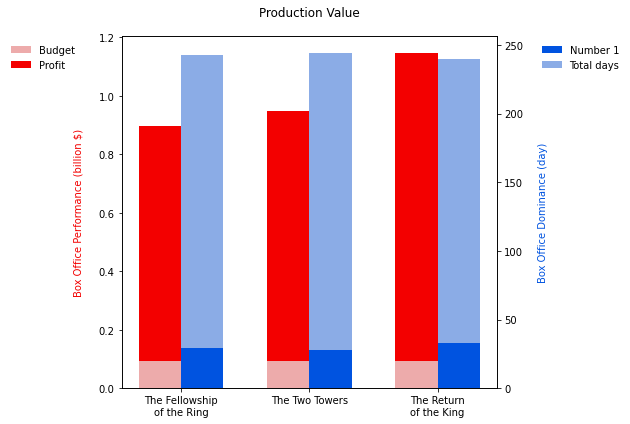

In [7]:
width = 0.33
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.bar(np.arange(3) - width/2, data_1["Budget"].values/10**9, width = width, color = "#EDABAB")
ax1.bar(np.arange(3) - width/2, data_1["Profit"].values/10**9, width = width, bottom = data_1["Budget"].values/10**9, color = "#F30000")
ax2.bar(np.arange(3) + width/2, data_1["DayNo1"].values, width = width, label = "Number 1", color = "#0053E0")
ax2.bar(np.arange(3) + width/2, data_1["DayOther"].values, width = width, bottom = data_1["DayNo1"].values, color = "#8BACE6")

plt.title('Production Value', pad = 20)
ax1.ticklabel_format(style = 'plain')
ax1.set_ylabel('Box Office Performance (billion $)', color = "#F30000")
ax1.yaxis.labelpad = 15
ax2.set_ylabel('Box Office Dominance (day)', color = "#0053E0")
ax2.yaxis.labelpad = 15
ax1.set_xticks([0.0, 1.0, 2.0])
ax1.set_xticklabels(['The Fellowship\nof the Ring', 'The Two Towers', 'The Return\nof the King'])

ax1.legend(['Budget', 'Profit'], bbox_to_anchor = ([-0.1, 1, 0, 0]), ncol = 1, frameon = False)
ax2.legend(['Number 1', 'Total days'], bbox_to_anchor = ([1.35, 1, 0, 0]), ncol = 1, frameon = False)
plt.tight_layout()
plt.show()

#### 2. Accolade

Accolade is the measurement of merits that the movies received. Here we simplified our variables by just considering Oscar and the other awards with the classification of actually winning one or just being nominated.

Considering the fact that a winner speaks more volumes than a nominee, we put twice as much weight on every win count. In other words, 1 win = 2 nominations. Summing them up with weights, we obtain 2 new variables, namely OscarWeight and OtherWeight. From there, the same logic applies as ScoreOscar and ScoreOther are the shares of each film in the trilogy and ScoreAccolade is the average of those.

In [8]:
data_2.loc[:, "NominationOther"] = data_2.loc[:, "NominationAll"] - data_2.loc[:, "NominationOscar"]
data_2.loc[:, "WinOther"] = data_2.loc[:, "WinAll"] - data_2.loc[:, "WinOscar"]
data_2.loc[:, "NotWinOther"] = data_2.loc[:, "NominationOther"] - data_2.loc[:, "WinOther"]
data_2.loc[:, "NotWinOscar"] = data_2.loc[:, "NominationOscar"] - data_2.loc[:, "WinOscar"]
data_2.loc[:, "OscarWeight"] = data_2.loc[:, "WinOscar"] * 2 + data_2.loc[:, "NotWinOscar"]
data_2.loc[:, "OtherWeight"] = data_2.loc[:, "WinOther"] * 2 + data_2.loc[:, "NotWinOther"]

data_2.loc[:, "ScoreOscar"] = score(data_2.loc[:, "OscarWeight"])  
data_2.loc[:, "ScoreOther"] = score(data_2.loc[:, "OtherWeight"]) 
data_2.loc[:, "ScoreAccolade"] = (data_2.loc[:, "ScoreOscar"] + data_2.loc[:, "ScoreOther"]) / 2

display(HTML(data_2.to_html(index = False)))

The diverging bar plot below once again indicates an outstanding feat by The Return of the King winning 100% of its Oscar nominations, making it the most Oscar-winning film of all time, sharing the throne with Titanic (1997) and Ben-Hur (1959). Although having fewer Oscar wins, The Fellowship of the Ring has more nominations, which is already a feat by itself considering the most Oscar-nominated film, again Titanic (1997), has but 1 more nomination, at 14.

On the other hand, The Two Towers did not fare well at the Oscar, at least in comparison to its siblings, the second installment was much more successful at other awards both in terms of nomination and win counts.

-> Verdict: overall, it is difficult to identify a dominant winner in the category. In absolute numbers, The Fellowship of the Ring and The Two Towers all share 43 nominations with 12 and 20 wins, respectively; while The Return of King won 27 out of fewer nominations at 40. Thus, opportunity conversion-wise, The Return of King is a clear winner, plus its Oscar feat. However, The Two Towers outperformed both its sequel and prequel on other merits. Unfortunately, since its performance at the Oscar was significantly behind the other 2, our metric puts it last in this category. The second place goes to a consistent contestant, The Fellowship of the Ring, while the King still remains strong on his throne.

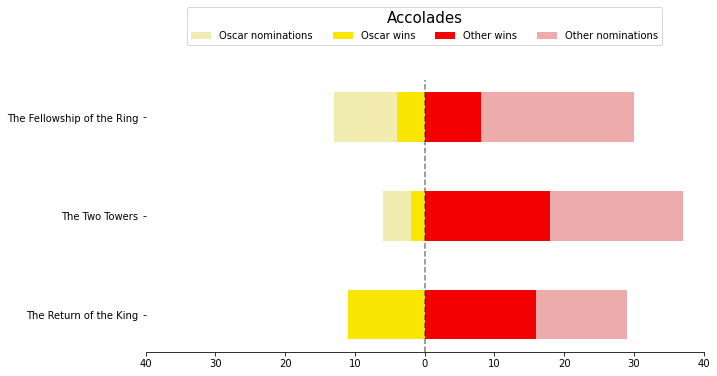

In [9]:
rewards = ["Oscar nominations", "Oscar wins", "Other wins", "Other nominations"]
results = {
    "The Fellowship of the Ring": data_2.loc[0, ["NotWinOscar", "WinOscar", "WinOther", "NotWinOther"]].values,
    "The Two Towers": data_2.loc[1, ["NotWinOscar", "WinOscar", "WinOther", "NotWinOther"]].values,
    "The Return of the King": data_2.loc[2, ["NotWinOscar", "WinOscar", "WinOther", "NotWinOther"]].values
}

def accolade(results, rewards):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis = 1)
    middle_index = data.shape[1]//2
    offsets = data[:, range(middle_index)].sum(axis=1)
    category_colors = ["#F1ECB0","#F9E602","#F30000","#EDABAB"]
    fig, ax = plt.subplots(figsize = (10, 5))
    
    # Plot Bars
    for i, (colname, color) in enumerate(zip(rewards, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(labels, widths, left = starts, height = 0.5,
                        label = colname, color = color)
    
    ax.axvline(0, linestyle = '--', color = 'black', alpha = 0.5)
    ax.set_xlim(-40, 40)
    ax.set_xticks(np.arange(-40, 41, 10))
    ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x))))
    ax.invert_yaxis()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.legend(title='Accolades', title_fontsize = 15, ncol = len(rewards), bbox_to_anchor = (0.5, 1.2), 
              loc = 'center', fontsize = 'medium')
    fig.set_facecolor('#FFFFFF')

    return fig, ax

fig, ax = accolade(results, rewards)
plt.show()

#### 3. Reception

Last but not least, we look at how the films have been received by the viewers as their legacies can only withstand the test of time as long as there are audiences who still hold them in their hearts.

The audiences here comprise both critics as well as the fans and common film viewers. Thus we turn to Rotten Tomatoes where the reviews are given by professional critics; IMDB where anyone can make an account to vote (or downvote); and Metacritic which is a combination of both.

Again, we calculate their respective shares in the trilogy and then average them out for the final score.

In [10]:
data_3.loc[:, "ScoreRottenTomatoes"] = score(data_3.loc[:, "RottenTomatoes"])  
data_3.loc[:, "ScoreMetacritic"] = score(data_3.loc[:, "Metacritic"]) 
data_3.loc[:, "ScoreIMDB"] = score(data_3.loc[:, "IMDB"]) 
data_3.loc[:, "ScoreReception"] = (data_3.loc[:, "ScoreRottenTomatoes"] + \
                                   data_3.loc[:, "ScoreMetacritic"] + \
                                   data_3.loc[:, "ScoreIMDB"]) / 3  
data_3

Movie  RottenTomatoes  Metacritic  IMDB  \
0  The Fellowship of the Ring              91          92    88   
1              The Two Towers              95          87    88   
2      The Return of the King              93          94    90   

   ScoreRottenTomatoes  ScoreMetacritic  ScoreIMDB  ScoreReception  
0                0.326            0.337      0.331           0.331  
1                0.341            0.319      0.331           0.330  
2                0.333            0.344      0.338           0.339

The connected scatterplot below clearly is in favor of The Return of the King with the only non-first rank coming from Rotten Tomatoes putting it in second place.

The Fellowship of the Ring, once again, stays consistently in second place.

The Two Towers has its up and down taking all 3 positions at some point.

-> Verdict: The Return of the King is again the winner, although barely while the other 2 are almost absolutely on par with each other with just a negligible lead for The Fellowship of the Ring.

In [11]:
data_3m = pd.melt(data_3, id_vars =['Movie'], value_vars =['ScoreRottenTomatoes', 'ScoreMetacritic', 'ScoreIMDB'])
pd.options.display.float_format = '{:,.3f}'.format
data_3m.columns = ['Movie', 'Review', 'Score']

fig = px.line(data_3m, x = "Review", y = "Score", color = "Movie")
fig.update_traces(mode = "markers+lines", hovertemplate = "%{y:.3f}", showlegend = False)
fig.update_layout(
    #{'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
    hovermode = "x unified", 
    title = {
        'text': "Reception",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_xaxes(
    title = None,
    ticktext = ["Rotten Tomatoes", "Metacritic", "IMDB"],
    tickvals = ["ScoreRottenTomatoes", "ScoreMetacritic", "ScoreIMDB"])
fig.update_yaxes(
    title_standoff = 35)

fig.show()

### VI. Final verdict
To sum up, we put all 3 movies on top of each other in a radar chart to compare them across 7 aforementioned sub-categories.

Visually speaking, The Return of the King either shares the first place or just simply wipes the floor with the other 2 in all but 1 category, non-Oscar awards, which go to The Two Towers. On the contrary, The Fellowship of the Ring has some edge over its second brother when it comes to Oscar.

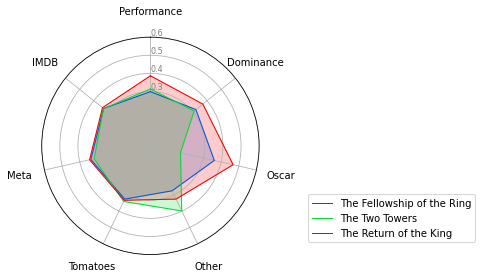

In [12]:
data_4pre = pd.concat([
    data.loc[:, "Movie"],
    data_1.loc[:, ["ScorePerformance", "ScoreDominance"]], 
    data_2.loc[:, ["ScoreOscar", "ScoreOther"]], 
    data_3.loc[:, ["ScoreRottenTomatoes", "ScoreMetacritic", "ScoreIMDB"]]], axis = 1)
data_4pre.columns = ['Movie', 'Performance', 'Dominance', 'Oscar', 'Other', 'Tomatoes', 'Meta', 'IMDB']

categories = list(data_4pre)[1:]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar = True)
 
#First axis on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
#Label position
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.xticks(angles[:-1], categories, size = 10)
plt.yticks([0.3, 0.4, 0.5, 0.6], ["0.3", "0.4", "0.5", "0.6"], color = "grey", size = 8)
plt.ylim(0, 0.6)
for tick in ax.xaxis.get_major_ticks()[0::2]:
    tick.set_pad(15)      
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
 
 
#Ind1
values = data_4pre.loc[0].drop('Movie').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, color = "#0053E0", linewidth = 1, linestyle = 'solid', label = "The Fellowship of the Ring")
ax.fill(angles, values, color = "#0053E0", alpha = 0.2)
 
#Ind2
values = data_4pre.loc[1].drop('Movie').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, color = "#00DC32", linewidth = 1, linestyle = 'solid', label = "The Two Towers")
ax.fill(angles, values, color = "#00DC32", alpha = 0.2)

#Ind3
values = data_4pre.loc[2].drop('Movie').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, color = "#F30000", linewidth = 1, linestyle = 'solid', label = "The Return of the King")
ax.fill(angles, values, color = "#F30000", alpha = 0.2)
 
# Add legend
plt.legend(bbox_to_anchor = (1.2, 0.3))

# Show the graph
plt.show()

For the final verdict, we condense those 7 sub-categories into just 3 main criteria as described in the beginning, namely Production value, Accolade and Reception. 

The Return of the King is slightly better in Reception while significantly beating the other 2 fair and square in both of the remaining criteria. The Two Towers marginally has an edge over The Fellowship of the Ring in terms of Production Value but lacks Accolades to compete for second place.

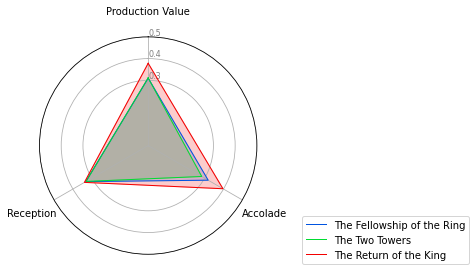

In [13]:
data_4final = pd.concat([
    data.loc[:, "Movie"],
    data_1.loc[:, "ScoreProduction"], 
    data_2.loc[:, "ScoreAccolade"], 
    data_3.loc[:, "ScoreReception"]], axis = 1)
data_4final.columns = ['Movie', 'Production Value', 'Accolade', 'Reception']

categories = list(data_4final)[1:]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar = True)
 
#First axis on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
#Label position
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.xticks(angles[:-1], categories, size = 10)
plt.yticks([0.30, 0.4, 0.5], ["0.3", "0.4", "0.5"], color = "grey", size = 8)
plt.ylim(0, 0.5)
for tick in ax.xaxis.get_major_ticks()[0::2]:
    tick.set_pad(15)      
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
 
 
#Ind1
values = data_4final.loc[0].drop('Movie').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, color = "#0053E0", linewidth = 1, linestyle = 'solid', label = "The Fellowship of the Ring")
ax.fill(angles, values, color = "#0053E0", alpha = 0.2)
 
#Ind2
values = data_4final.loc[1].drop('Movie').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, color = "#00DC32", linewidth = 1, linestyle = 'solid', label = "The Two Towers")
ax.fill(angles, values, color = "#00DC32", alpha = 0.2)

#Ind3
values = data_4final.loc[2].drop('Movie').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, color = "#F30000", linewidth = 1, linestyle = 'solid', label = "The Return of the King")
ax.fill(angles, values, color = "#F30000", alpha = 0.2)
 
# Add legend
plt.legend(bbox_to_anchor = (2, 0.2))

# Show the graph
plt.show()

We then derive the final score by taking the average of all 3 main criteria. Lastly, we convert these scores to a scale of 100 points, which go to the best one, then rank the other 2 accordingly.

In [14]:
data_4final.loc[:, "ScoreFinal"] = data_4final.iloc[:, data_4final.columns != 'Movie'].sum(axis = 1)
data_4final.loc[:, "Conversion"] = data_4final.loc[:, "ScoreFinal"] / max(data_4final.loc[:, "ScoreFinal"]) * 100
data_4final.loc[:, "Rank"] = data_4final['Conversion'].rank(ascending = False).astype('int32')

pd.options.display.float_format = '{:,.3f}'.format
display(HTML(data_4final.sort_values(by = "Rank").to_html(index = False)))

--> Final verdict: The Fellowship of the Ring and The Two Towers are a close call for second place yet due to a relative underperformance at the Oscar, the latter runs out of steam and loses the race.

As for the title the best of the trilogy, we have a clear winner: The Return of the King!

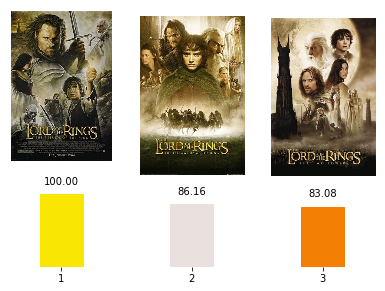

In [15]:
fig, ax = plt.subplots()
data_4rank = data_4final.loc[:, "Conversion"].values
data_4rank = np.sort(data_4rank)[::-1]

temp = plt.bar(np.arange(len(data_4rank)), data_4rank, width = 0.33)
temp[0].set_color('#F9E602')
temp[1].set_color('#E8E1DD')
temp[2].set_color('#F37F04')

for x, y in zip(np.arange(len(data_4rank)), data_4rank):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x, y), textcoords = "offset points", xytext = (0,10), ha = 'center')
    
ax.set_xticks([0.0, 1.0, 2.0])
ax.set_xticklabels(['1', '2', '3'])
ax.set_ylim(0, 300)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks([])

def getImage(path, zoom = 0.3):
    return OffsetImage(plt.imread(path), zoom = zoom)
paths = ['img/k.jpg', 'img/f.jpg', 'img/t.jpg']
x = [0, 1, 2]
y = data_4rank + 150
for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon = False)
    ax.add_artist(ab)

plt.show()

## Part B - Script Analysis of the Lord of Rings

This is the second part of this article. In this section, the article will analyse the lines of the Lord of the Rings trilogy. Two bar charts will be drawn to express how many lines each character has, and what proportion of them are in the different films. Afterwards, we will analyse the emotional tendencies in the lines with the help of NLTK, and we take the average of the emotional scores of each line as the emotional score of a character.

Note: NLTK is a leading platform for building Python programs to work with human language data. The Vader library can be used to rate the sentiment of words or sentences, with whole numbers representing positive sentiment and negative numbers representing negative sentiment. After comparing it with natural language processing libraries such as "NRC Emotion Lexicon", we chose NLTK.vader, which can analyse text passages.

The file "script.csv" contains multiple columns with categorical, text data. One additional column is supposely an index. Overall the data describes what each character in the Lord of the Rings trillogy said in a given movie.

In [16]:
# Load data
script = pd.read_csv("data/script.csv",encoding='utf-8')
script.head()

Unnamed: 0     char                                             dialog  \
0           0   DEAGOL  Oh Smeagol Ive got one! , Ive got a fish Smeag...   
1           1  SMEAGOL      Pull it in! Go on, go on, go on, pull it in!    
2           2   DEAGOL                                           Arrghh!    
3           3  SMEAGOL                                           Deagol!    
4           4  SMEAGOL                                           Deagol!    

                     movie  
0  The Return of the King   
1  The Return of the King   
2  The Return of the King   
3  The Return of the King   
4  The Return of the King

## 1.1 Tidying data 

A first step to subequently analyse the data is to clean so that working with given data is feasible. 

In the following code chunk multiple functions were created to clean the script. It's a rather tedious endeavour where punctuation, whitespace, upper/lowercase and other aspects about language were "cleaned".

Additionally, in the char column we had overlapping characters or simple data recording errors that needed fixing.

After data cleaning, we can obtain more usable data. Also, by removing words that have no sentiment value, we can reduce the number of confounding items in the sentiment analysis.

In [17]:
# cleaning data
# functions
rm_punctuation = lambda x : re.sub(r'[^A-Za-z]+', ' ', x)
rm_ewhite = lambda x: x.strip()
to_lower = lambda x: x.lower()
rm_num = lambda x: re.sub(r'\d+', '', x)
def remove_useless_words(sentence):
    excluded = ['no','not', 'nor', 'only', 'than', 'any', 'all',
                "thats","weve","hes","theres","ive","im","will",
                "can","cant","dont","youve","us","youre","youll",
                "theyre","whats","didnt" ]
    our_stop_words =[c for c in stopwords.words('english') if c not in excluded]
    result = ' '.join([word for word in sentence.split() if word not in (our_stop_words)])   
    return result

script.dropna(inplace=True)
nltk.download('stopwords')

# clean scrpit[dialog]

script["dialog"] = script["dialog"].apply(rm_punctuation)
script["dialog"]  = script["dialog"].apply(rm_ewhite)
script["dialog"]  = script['dialog'].apply(to_lower)
script["dialog"]  = script['dialog'].apply(rm_num)
script["dialog"] = script['dialog'].apply(remove_useless_words)

# clean scrpit[char]

script['char'] = script['char'].replace(to_replace ='VOICEOVER', value = '', regex=True)
script['char'] = script['char'].replace(to_replace ='VOICE OVER', value = '', regex=True)
script['char'] = script['char'].replace(to_replace ='VOICE-OVER', value = '', regex=True)
script['char'] = script['char'].replace(to_replace ='VOICE', value = '', regex=True)

script['char'] = script['char'].replace(to_replace ='SOLDIERS', value = 'SOLDIER', regex=True)
script['char'] = script['char'].replace(to_replace ='ORCS', value = 'ORC', regex=True)
script['char'] = script['char'].replace(to_replace ='MERRY PIPPIN', value = 'MERRY', regex=True)
script['char'] = script['char'].replace(to_replace ='MERRY AND PIPPIN', value = 'PIPPIN', regex=True)
script['char'] = script['char'].replace(to_replace ='SOLDIER ON GATE', value = 'SOLDIER', regex=True)
script['char'] = script['char'].replace(to_replace ='ARGORN', value = 'ARAGORN', regex=True)
script['char'] = script['char'].replace(to_replace ='GAN DALF', value = 'GANDALF', regex=True)
script['char'] = script['char'].replace(to_replace ='GATEKEEPR', value = 'GATEKEEPER', regex=True)
script['char'] = script['char'].replace(to_replace ='WHITE WIZARD', value = 'GANDALF', regex=True)

script['char'] = script['char'].apply(rm_punctuation)
script['char'] = script['char'].apply(rm_ewhite)
script['char'] = script['char'].apply(rm_num)
script['char'] = script['char'].apply(remove_useless_words)

pd.unique(script['char'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\46790\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['DEAGOL', 'SMEAGOL', 'GOLLUM', 'FRODO', 'MERRY', 'GIMLI', 'SAM',
       'GANDALF', 'ARAGORN', 'PIPPIN', 'HOBBIT', 'ROSIE', 'BILBO',
       'TREEBEARD', 'SARUMAN', 'THEODEN', 'GALADRIL', 'ELROND', 'GRIMA',
       'WITCH KING', 'EOWYN', 'FARAMIR', 'ORC', 'SOLDIER', 'GOTHMOG',
       'GENERAL', 'CAPTAIN', 'MOUTH OF SAURON', 'EOMER', 'ARMY', 'BOSON',
       'MERCENARY', 'EOWYN MERRY', 'DENETHOR', 'ROHIRRIM', 'GALADRIEL',
       'LEGOLAS', 'KING OF THE DEAD', 'GRIMBOLD', 'IROLAS', 'GAMLING',
       'MADRIL', 'DAMROD', 'SOLDIER IN MINAS TIRITH', 'WOMAN', 'HALDIR',
       'OLD MAN', 'BOROMIR', 'CROWD', 'ARWEN', 'HAMA', 'SHARKU', 'PEOPLE',
       'LADY', 'FREDA', 'MORWEN', 'EYE OF SAURON', 'ROHAN STABLEMAN',
       'GORBAG', 'UGLUK', 'SHAGRAT', 'URUK HAI', 'SNAGA', 'GRISHNAKH',
       'MERRY PIPPIN', 'WILDMAN', 'STRIDER', 'EOTHAIN', 'ROHAN HORSEMAN',
       'SAURON', 'FARMER MAGGOT', 'GAFFER', 'NOAKES', 'SANDYMAN',
       'FIGWIT', 'GENERAL SHOUT', 'GRISHNAK', 'MRS BRACEGIRDLE',
       

## 1.2 Further Data Manipulation

For the following visualisations we require the data to be structured differently and manipulated. By imposing a limit on the amount of lines, we removed characters with too small a sample size of lines. We'll end up having a grouped and reduced data set with three columns. We'll have characters, movie and the count.  

In [18]:
# Add a column 'count' counting how many Dialog lines spoken by the character in total
script["count"] = script["char"].map(lambda x: script["char"].tolist().count(x) )
script = script.sort_values("count",ascending = False)
char = script["char"]
script.head()

script = script[script["count"]>=20] # reduce the amount of characters for the plots

# Group characters per movie. We are doing this to prep the data so that we can use them for visualisations split by movie
grouped = script.groupby(["char", "movie"]).count()
grouped = grouped.reset_index()
grouped = grouped.iloc[:,:3]
grouped.columns = ["char","movie","count"]
movie_order = np.array(["The Fellowship of the Ring","The Two Towers","The Return of the King"]).astype(object)
grouped.head()

char                        movie  count
0  ARAGORN  The Fellowship of the Ring      27
1  ARAGORN      The Return of the King      61
2  ARAGORN              The Two Towers     101
3    ARWEN  The Fellowship of the Ring      15
4    ARWEN      The Return of the King       9

Here we widen the data set. Each movie appears as a column containing the amount of dialogue lines spoken per character.

In [19]:
# change the format for grouped data in order to draw plot below
movie = ["The Fellowship of the Ring ","The Two Towers ","The Return of the King "]
grouped["The Fellowship of the Ring"] = 0
grouped["The Two Towers"] = 0
grouped["The Return of the King"] = 0

for i in range(len(grouped["char"])):
        if grouped["movie"][i] == "The Fellowship of the Ring ":
            grouped["The Fellowship of the Ring"][i] = grouped["count"][i]
        elif grouped["movie"][i] == "The Two Towers ":
            grouped["The Two Towers"][i] = grouped["count"][i]
        else:
            grouped["The Return of the King"][i] = grouped["count"][i]     
            
grouped = grouped.drop(['movie'], axis=1)            
script_per_movie = grouped.groupby("char").agg({'The Fellowship of the Ring': [sum],
                                            'The Two Towers': [sum], "The Return of the King":[sum],"count":[sum]})
script_per_movie.columns = ["_".join(x) for x in script_per_movie.columns.ravel()]
script_per_movie = script_per_movie.sort_values(by = ["count_sum"])
script_per_movie.head()

<ipython-input-19-68a0301a1964>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-68a0301a1964>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-68a0301a1964>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-68a0301a1964>:18: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



The Fellowship of the Ring_sum  The Two Towers_sum  \
char                                                          
GRIMA                                 0                  23   
ORC                                   2                   7   
STRIDER                              25                   0   
ELROND                                8                  10   
EOMER                                 0                  19   

         The Return of the King_sum  count_sum  
char                                            
GRIMA                             2         25  
ORC                              16         25  
STRIDER                           0         25  
ELROND                           13         31  
EOMER                            17         36

## 1.3 Horizontal Barchart spoken lines per character

Visualising how many dialogue lines each characters speaks. Very straight forward.

findfont: Font family ['Econ Sans Cnd'] not found. Falling back to DejaVu Sans.


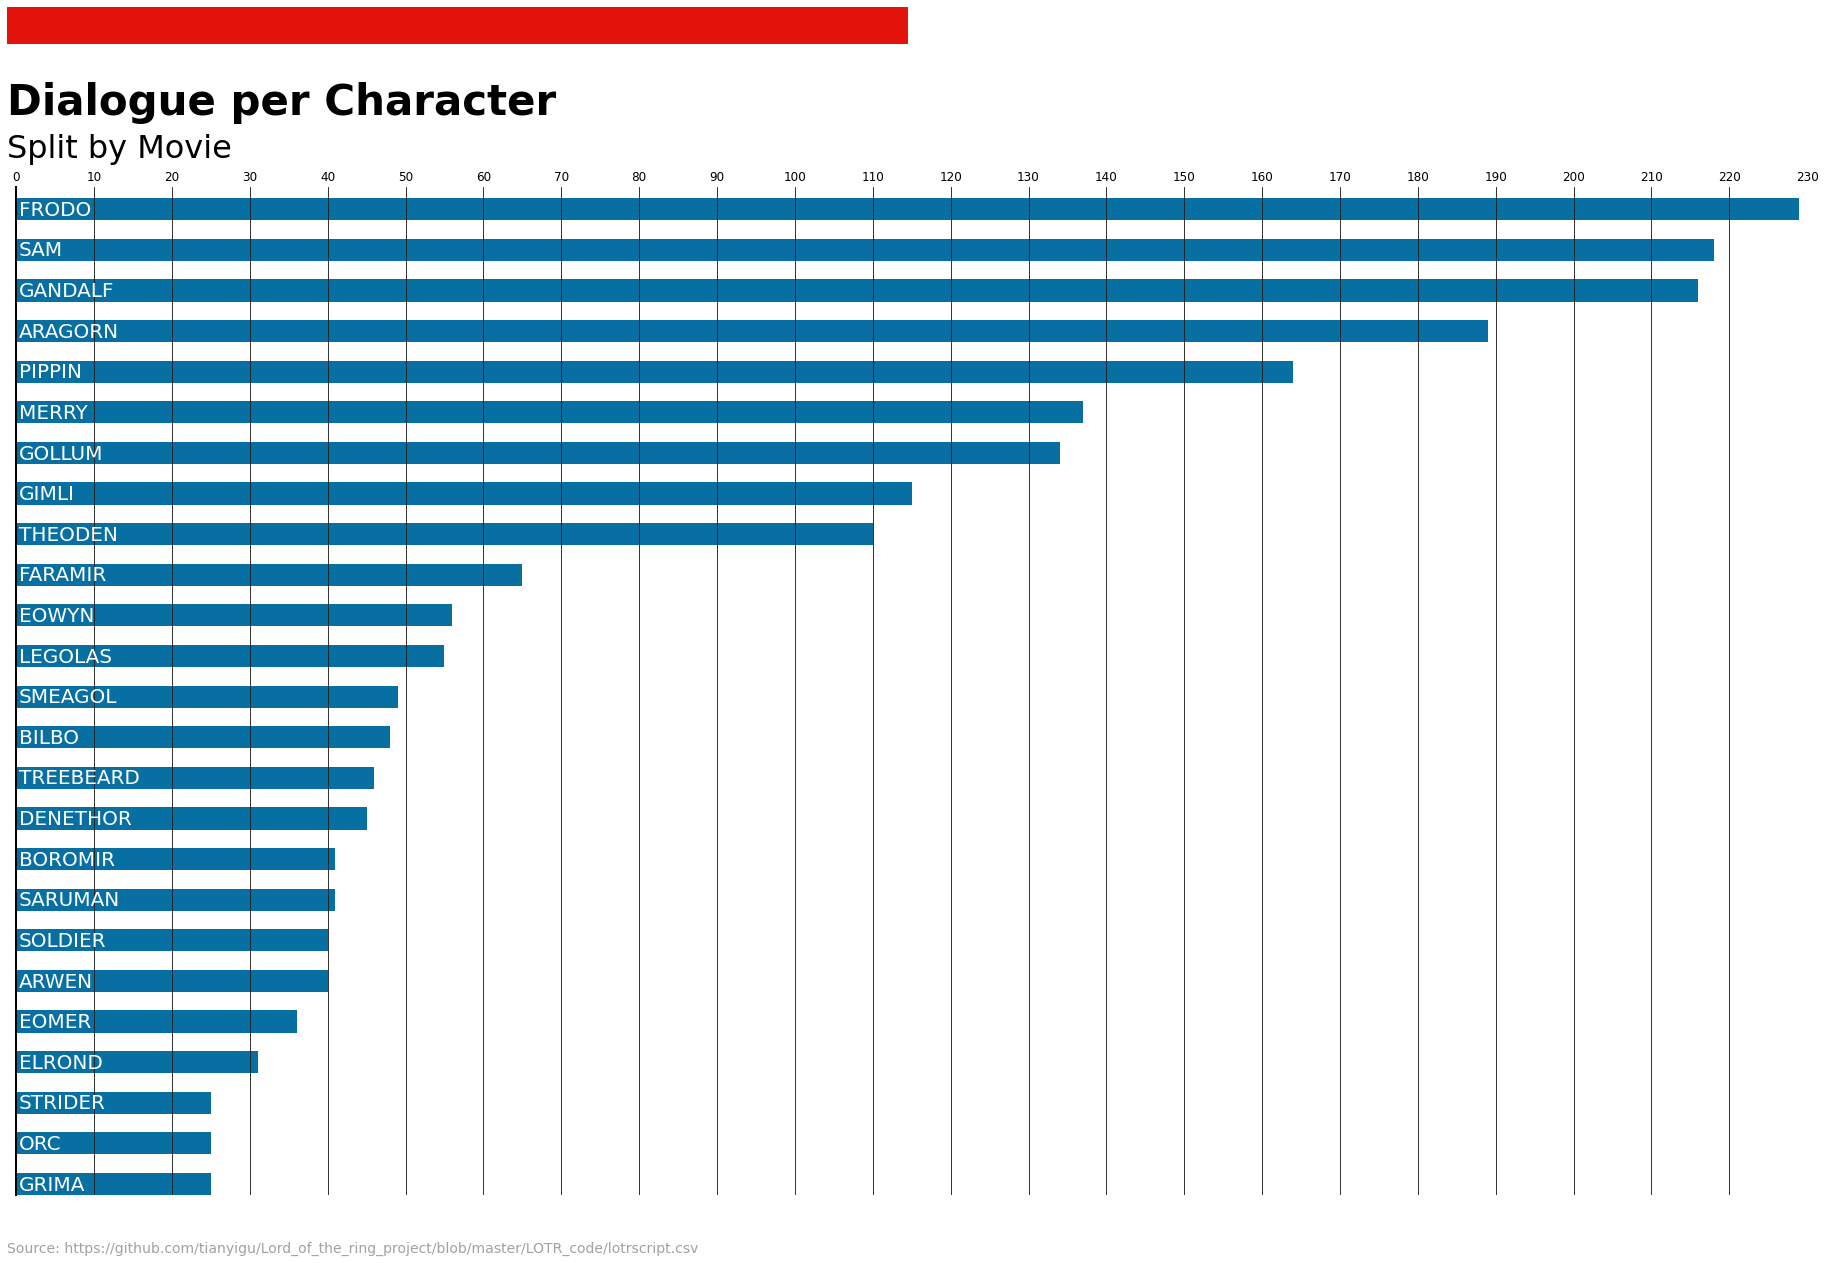

In [20]:
# define some variables from the data
chars = script_per_movie.index.values.tolist()
dia_total = np.sort(script_per_movie['count_sum'])

# y is a vector giving us the positions of the bars
y = [i * 1.1 for i in range(len(chars))]

# predefine some colours
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"

# creating a figure
fig, ax = plt.subplots(figsize=(25, 20))
# Creating horizontal bars from the data
ax.barh(y, dia_total, height=0.6, align="edge", color=BLUE);

# Customizing chart
ax.xaxis.set_ticks([i * 10 for i in range(len(chars))])
ax.xaxis.set_ticklabels([i * 10 for i in range(len(chars))], size=12, fontfamily="Econ Sans Cnd", fontweight=100)
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.set_xlim((0, 230))
ax.set_ylim((0, len(chars)*1.1-0.2))
ax.grid(axis = "x", color=BLACK, lw=0.9) # creating and customizing grid lines
ax.spines["right"].set_visible(False) # remove grid line to the far right
ax.spines["top"].set_visible(False) # remove top line
ax.spines["bottom"].set_visible(False) # remove bottom line
ax.spines["left"].set_lw(2) # increase width of far left line
ax.yaxis.set_visible(False)

# Customizing labels
for chars, y_pos in zip(chars, y):
    x = 0
    colour = "white"
    path_effects = None
    ax.text(
        x + 0.3, y_pos + 0.5/4, chars,
        color = colour, fontsize = 20, path_effects=path_effects
    )
    
# Adding annotations
# We have to create space for the title at the top but remove space from the left
fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)

# Add title
fig.text(
    0, 0.85, "Dialogue per Character", 
    fontsize=42, fontweight="bold"
)

# Add subtitle
fig.text(
    0, 0.82, "Split by Movie", 
    fontsize=32,
)

# Add caption
fig.text(
    0, 0.06, "Source: https://github.com/tianyigu/Lord_of_the_ring_project/blob/master/LOTR_code/lotrscript.csv", color=GREY, 
    fontsize=14
)

# Add a rectangle on top. Just for visuals.
from matplotlib import lines
from matplotlib import patches
fig.add_artist(patches.Rectangle((0, 0.9), 0.5, 0.025, color=RED))

Same approach, just splitting each bar by movie.

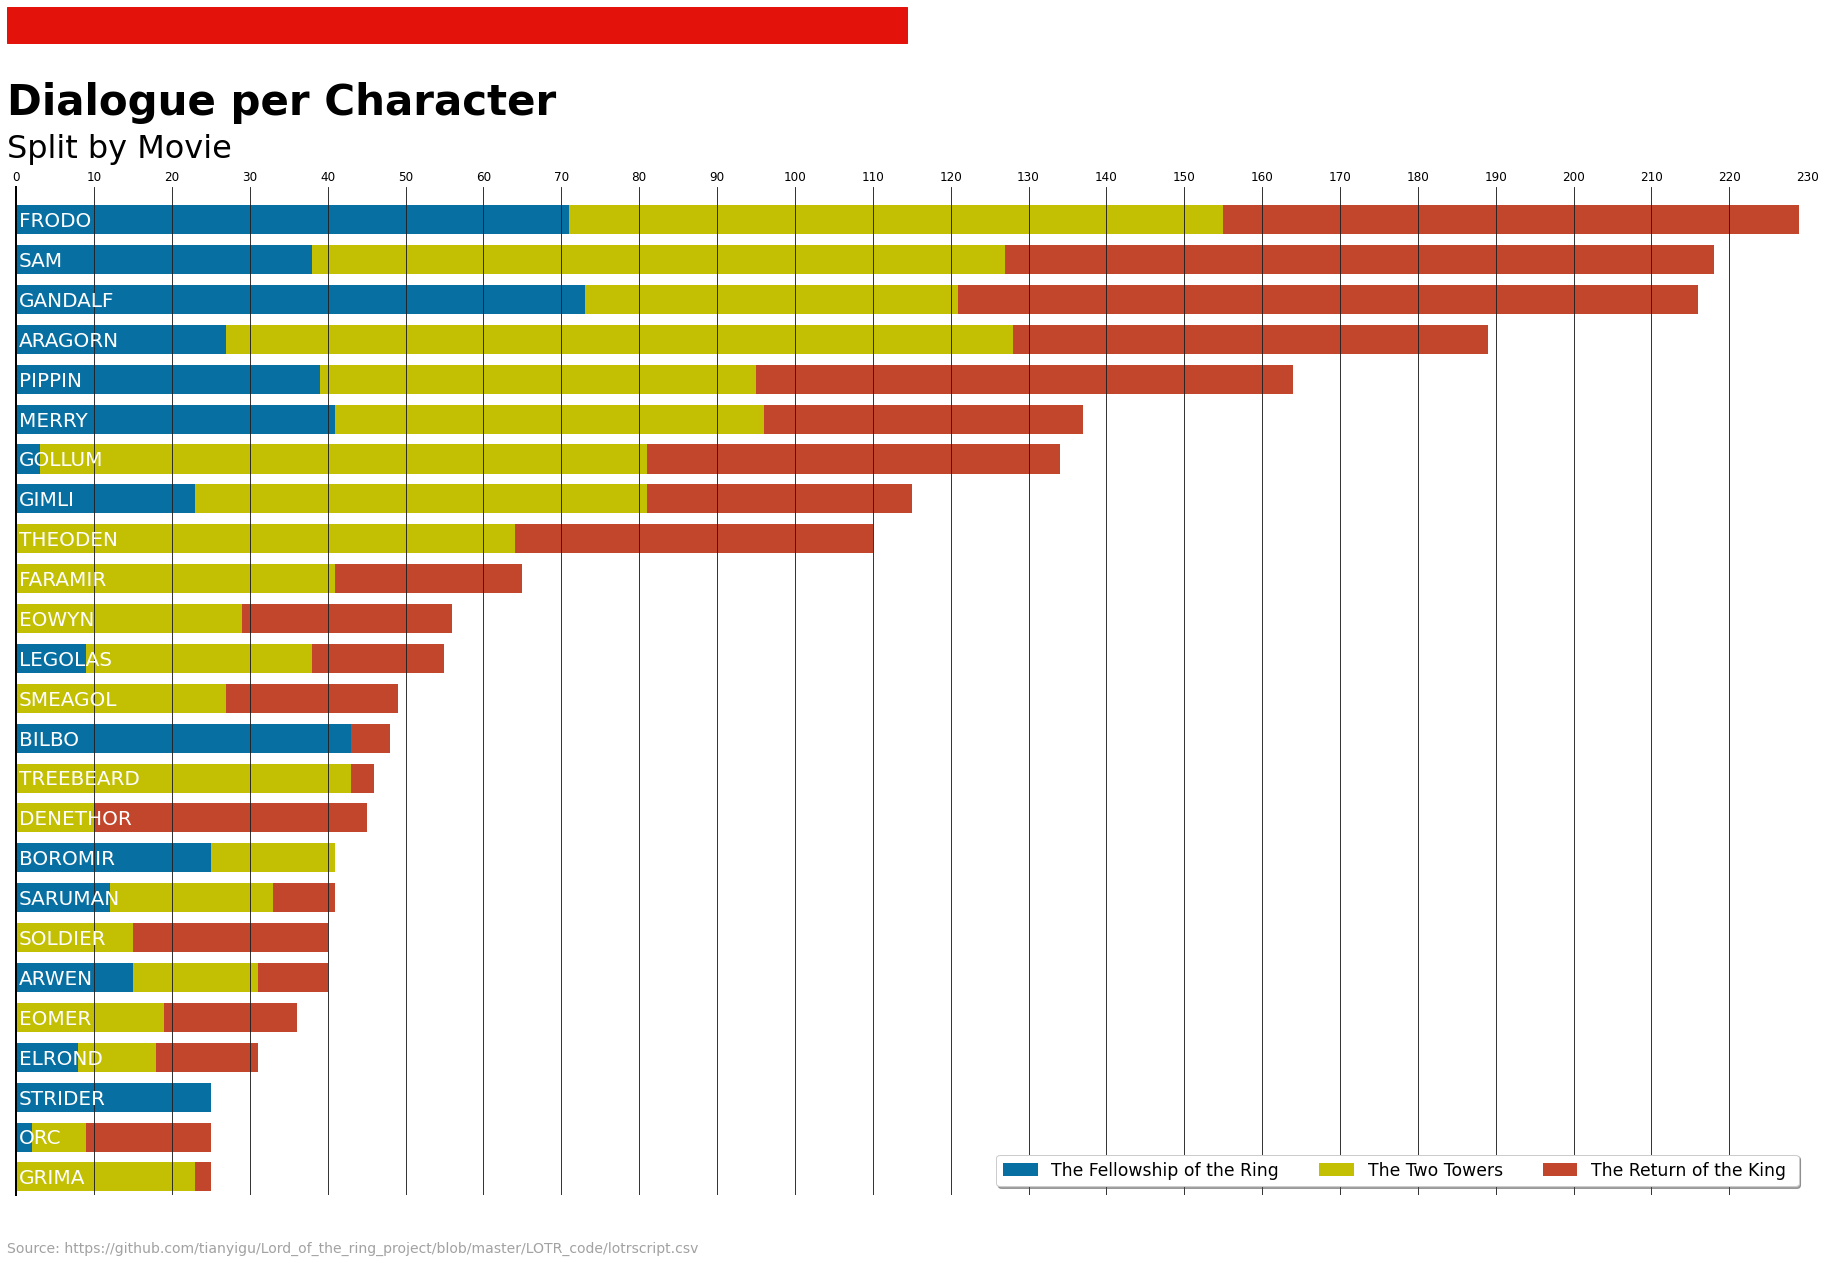

In [21]:
# Now we are trying to differentiate by movie
fields = ["The Fellowship of the Ring_sum", "The Two Towers_sum", "The Return of the King_sum"]
colors = [ '#076fa2', '#c3bf03', '#c1462c']
movie = ["The Fellowship of the Ring ","The Two Towers ","The Return of the King "] # needed for labels

# define some variables from the data
chars = script_per_movie.index.values.tolist()
dia_total = np.sort(script_per_movie['count_sum'])

fig, ax = plt.subplots(1, figsize=(25, 20))
y = [i * 1.1 for i in range(len(chars))]

# plot bars
left = len(script_per_movie)*[0]
for idx, name in enumerate(fields):
    plt.barh(y, script_per_movie[name], left = left, color=colors[idx])
    left = left + script_per_movie[name]
    
# Customizing chart
ax.xaxis.set_ticks([i * 10 for i in range(len(chars))])
ax.xaxis.set_ticklabels([i * 10 for i in range(len(chars))], size=12, fontweight=100)
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.set_xlim((0, 230))
ax.set_ylim((-0.5, len(chars)*1.1-0.2))
ax.grid(axis = "x", color=BLACK, lw=0.9) # creating and customizing grid lines

# Removing spines
ax.spines["right"].set_visible(False) # remove grid line to the far right
ax.spines["top"].set_visible(False) # remove top line
ax.spines["bottom"].set_visible(False) # remove bottom line
ax.spines["left"].set_lw(2) # increase width of far left line
ax.yaxis.set_visible(False)
   
# Adding annotations
# We have to create space for the title at the top but remove space from the left
fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)

# Placing labels
for chars, y_pos in zip(chars, y):
    x = 0
    colour = "white"
    path_effects = None
    ax.text(
        x + 0.3, y_pos-0.2, chars,
        color = colour, fontsize = 20, path_effects=path_effects
    )

# Add title
fig.text(
    0, 0.85, "Dialogue per Character", 
    fontsize=42, fontweight="bold"
)

# Add subtitle
fig.text(
    0, 0.82, "Split by Movie", 
    fontsize=32,
)

# Add caption
fig.text(
    0, 0.06, "Source: https://github.com/tianyigu/Lord_of_the_ring_project/blob/master/LOTR_code/lotrscript.csv", color=GREY, 
    fontsize=14
)

# Add a rectangle on top. Just for visuals.
from matplotlib import lines
from matplotlib import patches
fig.add_artist(patches.Rectangle((0, 0.9), 0.5, 0.025, color=RED))

#
plt.legend(movie, loc = "best", ncol = 3, fontsize = "xx-large", shadow = True)

## 1.4 Sentiment Analysis

Using the same data set as before, now we are trying to compute the sentiment of each character determined by their lines spoken in the trillogy.

In [22]:
# Here we clean the data adapted from from https://github.com/tianyigu/Lord_of_the_ring_project/blob/master/LOTR_code/LOTR_DEMOGRAPH.ipynb
def tidyData(character):
    data = script[script["char"]==character]["dialog"].map(lambda x : x.replace(" ,","")).reset_index(
    drop=True).tolist()
    return data

# Applying cleaning function to each character that has been pre-selected
frodo = tidyData("FRODO")
sam = tidyData("SAM")
gandalf = tidyData("GANDALF")
aragorn = tidyData("ARAGORN")
pippin = tidyData("PIPPIN")
merry = tidyData("MERRY")
gollum = tidyData("GOLLUM") 
gimli = tidyData("GIMLI")
theoden = tidyData("THEODEN")
faramir = tidyData("FARAMIR")
eowyn = tidyData("EOWYN")
legolas = tidyData("LEGOLAS")
smeagol = tidyData("SMEAGOL")
bilbo = tidyData("BILBO")
treebeard = tidyData("TREEBEARD")
denethor = tidyData("DENETHOR")
boromir = tidyData("BOROMIR")
arwen = tidyData("ARWEN")
soldier = tidyData("SOLDIER")
eomer = tidyData("EOMER")
saruman = tidyData("SARUMAN")
elrond = tidyData("ELROND")
strider = tidyData("STRIDER")
grima = tidyData("GRIMA")
orc = tidyData("ORC")

# This step is purely done so we have a better oversight over the data and results printed out later
charlist = {"FRODO":frodo,"SAM":sam,"GANDALF":gandalf,
            "ARAGORN":aragorn,"PIPPIN":pippin,"MERRY":merry,"GOLLUM":gollum,"GIMLI":gimli,"THEODEN":theoden,"FARAMIR":faramir,
            "EOWYN":eowyn,"LEGOLAS":legolas,"SMEAGOL":smeagol,"BILBO":bilbo,
            "TREEBEARD":treebeard,"DENETHOR":denethor,
            "BOROMIR":boromir,"ARWEN":arwen,"SOLDIER":soldier,
            "EOMER":eomer,"SARUMAN":saruman,"ELROND":elrond,"STRIDER":strider,"GRIMA":grima,"ORC":orc}
len([*charlist])

25

### 1.4.2 Constructing sentiment analysis function
The following code chunk provides a function allowing us to compute and return the sentiment value given by the polarity score that is provided by nltk library.

In [23]:
# Load libraries for sentiment analysis and accuracy score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

# sentiment analysis
def sentiment(char):
    vader = SentimentIntensityAnalyzer()
    res_dic = [vader.polarity_scores(text) for text in charlist[char]]
    res_dic = [res_dic[i] for i in range(len(res_dic)) if res_dic[i]["compound"]!=0]
    res_neg = np.mean([res_dic[i]['neg'] for i in range(len(res_dic))])
    res_pos = np.mean([res_dic[i]['pos'] for i in range(len(res_dic))])
    res_com = np.mean([res_dic[i]['compound'] for i in range(len(res_dic))])
    return res_com


Compute sentiment score for each character and manipulating the such that visualisations are feasible

In [24]:
# Create empty array
temp = []
temp = np.array(temp)

# Create an arraylist with sentiment values
for i in charlist:
    temp = np.append(temp, sentiment(i))
    sentiment_scores = temp

temp = []
temp = np.array(temp)

# Treemaps need absolute values so we take the absolute values of the sentiment score
for i in charlist:
    temp = np.append(temp, sentiment(i))
    sentiment_scores_abs = abs(temp)
    
    
    
# Need to manually add a categorical data column so that we can still differentiate between the absolute values
sentiment = np.array(["positive", "negative", "negative", "negative", "positive","positive",
                      "negative", "positive", "negative", "negative","negative", "negative",
                      "positive", "positive", "positive", "negative", "positive", "positive",
                      "negative", "negative", "negative", "negative", "positive", "negative",
                      "positive"])

# Combining characters and scores
chars_sentiment = script_per_movie.index.values.tolist()    
# chars_sentiment = np.delete(chars_sentiment, [17]) # need to remove Gimli

df_sentiment = pd.DataFrame({"Characters": np.flip(chars_sentiment), "Sentiment_Score": sentiment_scores,
                             "Sentiment_scores_abs": sentiment_scores_abs, "Sentiment": sentiment})

df_sentiment

Characters  Sentiment_Score  Sentiment_scores_abs Sentiment
0       FRODO            0.077                 0.077  positive
1         SAM           -0.083                 0.083  negative
2     GANDALF           -0.016                 0.016  negative
3     ARAGORN           -0.003                 0.003  negative
4      PIPPIN            0.193                 0.193  positive
5       MERRY            0.073                 0.073  positive
6      GOLLUM           -0.018                 0.018  negative
7       GIMLI            0.066                 0.066  positive
8     THEODEN           -0.074                 0.074  negative
9     FARAMIR           -0.029                 0.029  negative
10      EOWYN           -0.035                 0.035  negative
11    LEGOLAS           -0.133                 0.133  negative
12    SMEAGOL            0.017                 0.017  positive
13      BILBO            0.320                 0.320  positive
14  TREEBEARD            0.056                 0.056  positive
15   DENETHOR           -0.096                 0.096  negative
16    BOROMIR            0.001                 0.001  positive
17    SARUMAN            0.054                 0.054  positive
18    SOLDIER           -0.020                 0.020  negative
19      ARWEN           -0.255                 0.255  negative
20      EOMER           -0.107                 0.107  negative
21     ELROND           -0.069                 0.069  negative
22    STRIDER            0.034                 0.034  positive
23        ORC           -0.286                 0.286  negative
24      GRIMA            0.053                 0.053  positive

## 1.5 Constructing a Treemap

Constructing a treemap that has shows the sentiment score by size of rectangle and by colour if it's either a positive or negative sentiment. It's to no suprise that Grima and the combination of all lines spoken by orcs have the most negative score. However, it is a suprising finding that Legolas and Sam are negative as well. Characters such as Theoden, Denethor or Elrond are quite pissimistic, so they are expected to be on the negative side of sentiment. A deeper analysis of what Legolas or Sam have to say during the movie is necessary to follow validate the findings. 
In contrast, the jolly Hobbit Bilbo score the highest positive sentiment. To no suprise, given that he wasn't in any dangerous position and spent most of his lines talking about his birthday and celebration.
What is a very interesting finding is that Gollum and Smeagol are infact on opposite halves. 

In [25]:
# Constructing a treemap of the sentiments
import squarify
import plotly.express as px

fig = px.treemap(df_sentiment, path=[px.Constant("Lord of the Rings Characters"), "Sentiment", "Characters"],
                 values = "Sentiment_scores_abs", color = "Sentiment_Score", color_continuous_scale=["red", "white", "green"],
                width = 1800, height = 1000)
fig.update_layout(margin = dict(t=10, l=25, r=25, b=25))
fig.show()

## 1.6 Constructing a bubble chart

Constructing a bubble chart for the sentiment score. It is considerably worse and is redundant. Might remove for final version

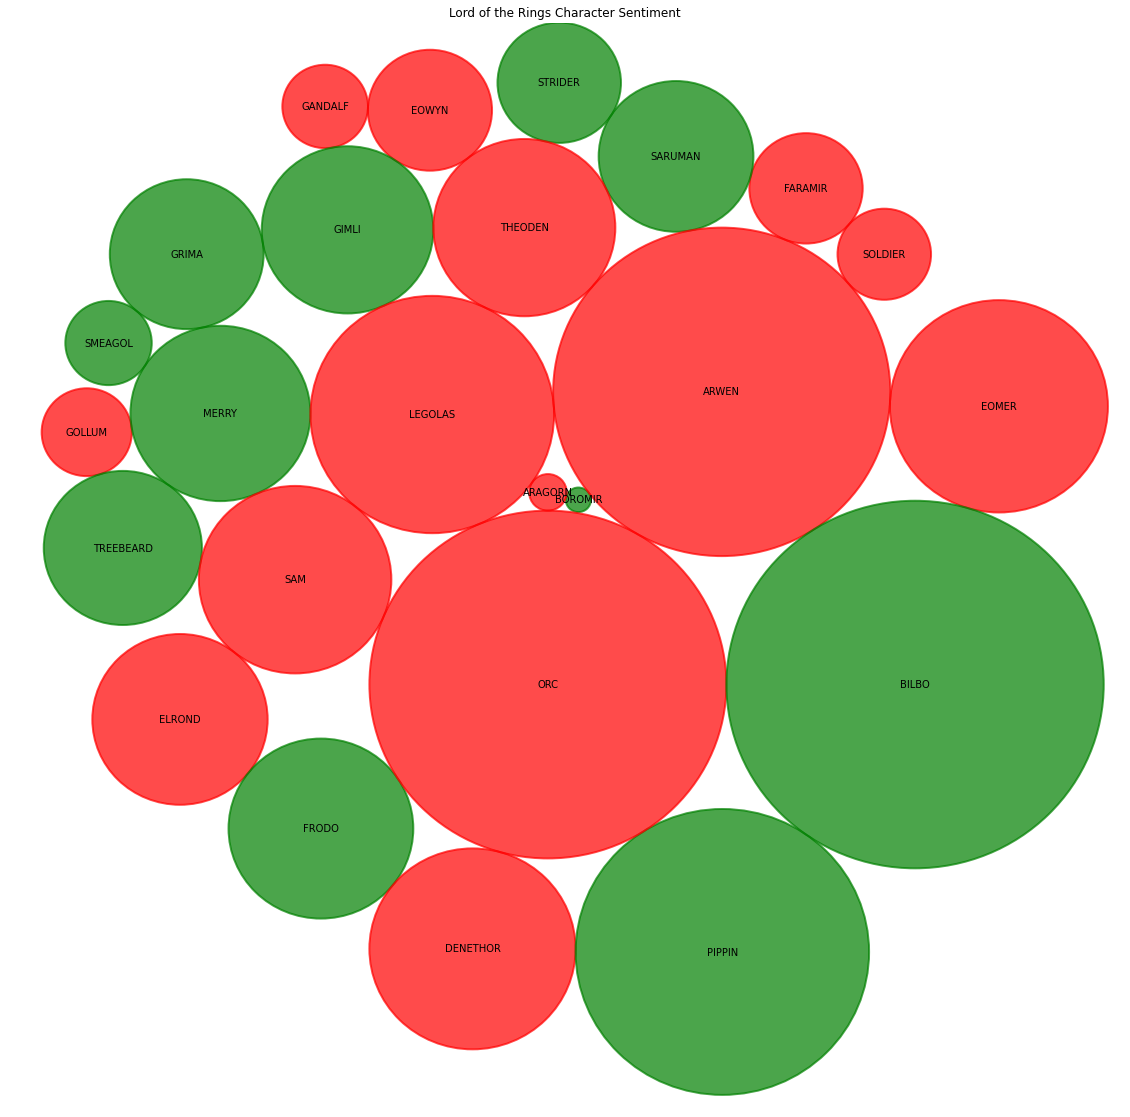

In [26]:
# Constructing a bubble chart
import circlify

# Need to sort by absolute sentiment value for this
df_sentiment_sorted = df_sentiment.sort_values(by = "Sentiment_scores_abs")

# compute circle positions:
circles = circlify.circlify(
    df_sentiment_sorted["Sentiment_scores_abs"].tolist(), 
    show_enclosure = False, 
    target_enclosure = circlify.Circle(x=0, y=0, r=1)
)

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(20,20))

# Title
ax.set_title("Lord of the Rings Character Sentiment")

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = df_sentiment_sorted["Characters"]
colors = ['Green' if val == "positive" else 'Red' for val in df_sentiment_sorted["Sentiment"]]

# print circles
for circle, label, color in zip(circles, labels, colors):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.7, linewidth=2, color = color))
    plt.annotate(label, (x, y), va='center', ha='center')

## 2 Sentiment and Age

We have obtained an emotional score for each character by examining the emotional disposition of each line. In this section we will average the emotional scores for each word and then try to show how the age of the characters in Lord of the Rings relates to their emotional state.

Our hypothesis is that older people will be calmer and have less emotional turmoil in their lines. In the graph, they will be around the 0 cut-off.

### 2.1 Pre-Processing

First, we define a function to find the sentiment score. In contrast to the previous method, here we aggregate all the words spoken by the character and then average them.

We analysed all the above characters with more than 20 lines of dialogue. There are 25 characters in total. Of these we have analysed Orcs as a character.

- Frodo Baggins
- Samwise Gamgee
- Gandalf
- Aragorn
- Gollum
- Pippin Took
- Merry Brandybuck
- Arwen
- Orc
- Gimli
- Théoden
- Faramir
- Éowyn
- Legolas
- Bilbo Baggins
- Treebeard
- Denethor II.
- Boromir
- Soldiers
- Éomer
- Saruman
- Elrond
- Strider (Aragorn II)
- Gríma Wormtongue
- Sméagol(Gollum)

We have found estimates of the age of these characters on the internet(sources are shown in the reference), not in terms of their lifespan, but in terms of their age at the time of their appearance in the film and television. It should be noted that as the books and films are not explicit about the age of certain characters when they appear, part of the data has an element of guesswork.

We have done the data cleaning before, so there is no need to do it again here.

In [27]:
def flattena(t):
    return [item for sublist in t for item in sublist]

def sentiment_c(char):
    vader = nltk.sentiment.vader.SentimentIntensityAnalyzer()
    d3 = flattena([ word.split() for word in charlist[char]])
    res_dic = [vader.polarity_scores(word) for word in d3]
    res_dic = [res_dic[i] for i in range(len(res_dic)) if res_dic[i]["compound"]!=0]
    res_neg = np.mean([res_dic[i]['neg'] for i in range(len(res_dic))])
    res_pos = np.mean([res_dic[i]['pos'] for i in range(len(res_dic))])
    res_com = np.mean([res_dic[i]['compound'] for i in range(len(res_dic))])
    return res_com

ages = {
    'FRODO': 50,
    'SAM':38,
    'GANDALF':2000,
    'ARAGORN':87,
    'PIPPIN':29,
    'MERRY' :37,
    'GOLLUM':589,
    
    'GIMLI': 139,
    'THEODEN':71,
    'FARAMIR':36,
    'EOWYN':24,
    'LEGOLAS':2931,
    'SMEAGOL':589,
    'BILBO' :129,
    'TREEBEARD':7400,
    'DENETHOR':89,
    
    'BOROMIR': 41,
    'ARWEN':2901,
    'SOLDIER':26,
    'EOMER':28,
    'SARUMAN':1000,
    'ELROND':6000,
    'STRIDER' :87,
    'GRIMA':2000,
    'ORC':40,
}

### 2.2 Sentiment analysis

We do the sentiment analysis word by word this time.

We found a slight difference between the results obtained from sentence-by-sentence and word-by-word analyses. The reason for this may be that we live with more zeros in word-by-word analysis. more zeros means greater robustness and less response to outliers.

In [28]:
senc = {}
for i in charlist:
    senc[i] = sentiment_c(i)

### 2.3 Normalisation of data.

We provide two methods of normalising the data here. The Z-Score in the library organises the data so that they are distributed over the interval [-1,1], thus preserving their positive and negative signs. We have written our own alternative normalisation method to redistribute the data over the interval (0,1).

We will cross-use these two methods later in the plotting and data processing.

The figure below shows the distribution of our sentiment score data after processing through the Z-score.

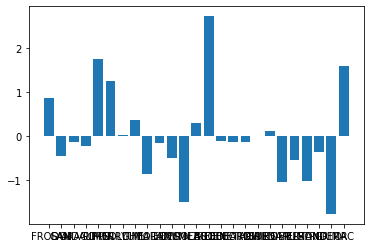

In [29]:
# calculate the score word by word, z-score
sfc = [*senc]
vfc = [v for v in senc.values()]
n_vfc = stats.zscore(vfc)
plt.bar(sfc, n_vfc)

normalized = lambda x: (x-min(x))/(max(x)-min(x))

agek = [*ages]
agev = [v for v in ages.values()]

n_vfcb = normalized(np.array(vfc))
n_agevb = normalized(np.array(agev))
n_agev = stats.zscore(agev)

### 2.4 The relationship between age and mood scores.

This double y-axis graph shows our data, and it is difficult to see a clear relationship between age and mood scores.

The data used here for both age and mood scores are unprocessed, as this makes it more obvious that there is no clear relationship between them and that the fluctuations in each are unpredictable.

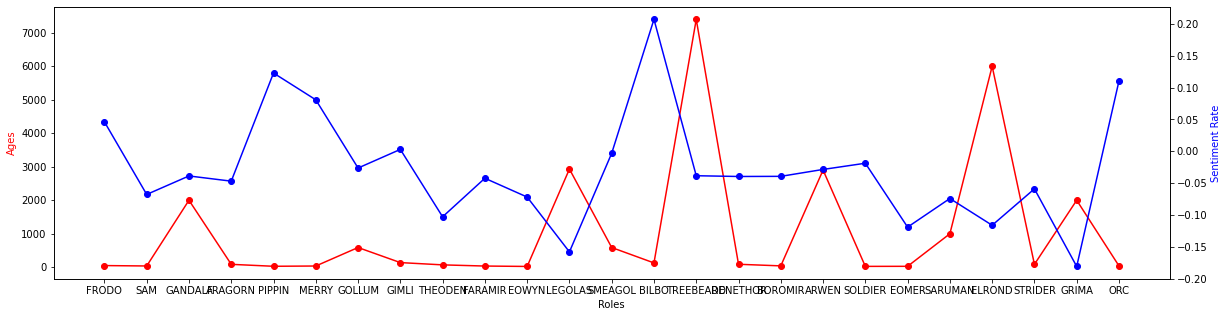

In [30]:
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(agek,agev,color="red", marker="o")
ax.set_xlabel("Roles")
ax.set_ylabel("Ages", color="red")

ax2=ax.twinx()
ax2.plot(sfc, vfc,color="blue",marker="o")
ax2.set_ylabel("Sentiment Rate", color="blue")
plt.show()

### 2.5 Difference between age and mood score

In this graph we have used a bar chart structure that was used earlier in the article. We have arranged the data in order from largest to smallest in an attempt to summarise the pattern of the difference between age and emotional orientation.

We used the normalized() function to scale the age and score data to between (0,1) so that we could better compare their proportional relationship. Once again, we do not see any obvious pattern.

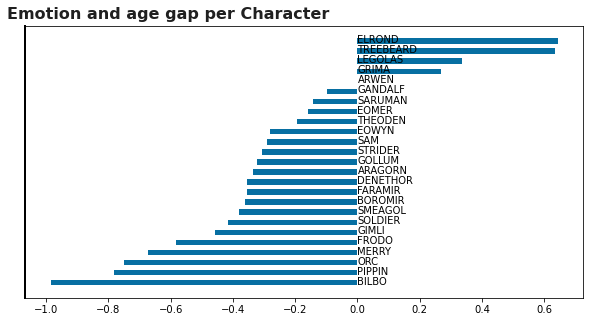

In [31]:
gap = [n_agevb[i]-n_vfcb[i] for i in range(0,len(n_agevb))]

dfgap = pd.DataFrame.from_dict(
    {'name': sfc, 'gap': gap}
)
dfgap = dfgap.sort_values("gap",ascending = False)

k = dfgap.index.values.tolist()
v = np.sort(dfgap['gap'])

y = [i * 1.1 for i in range(len(k))]
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(y, v, height=0.6, align="edge", color=BLUE);

# Customizing chart

# ax.set_xlim((0, 600))
# ax.set_ylim((0, len(k)*1.1-0.2))
ax.spines["left"].set_lw(2) # increase width of far left line
ax.yaxis.set_visible(False)

# Customizing labels
k.reverse()
for k, y_pos in zip(k, y):
    x = 0
    colour = "black"
    path_effects = None
    ax.text(
        x, y_pos + 0.5/4, sfc[k],
        color = colour, fontsize = 10, path_effects=path_effects
    )

# Add title
fig.text(
    0.1, 0.9, "Emotion and age gap per Character", 
    fontsize=16, fontweight="bold",color=BLACK
)

plt.show()
# dfgap

### 2.6 The relationship between age and emotional expression

Finally, we have represented visually the relationship between a character's tendency to express emotions and his or her age through a scatter chart containing the avatars of each character. We will be able to see that characters of different ages are more likely to express more negative, more positive or flatter emotions.

Here, we did not normalise the data for age. We normalised the Z-score for sentiment scores stand for tendency to express different emotions.

It is worth mentioning that we have changed the scale of the X-axis by applying a scale change to the X-axis. We applied the "symlog" here, it means symmetrical log, and allows positive and negative values. It also allows to set a range around zero within the plot will be linear instead of logarithmic. This facilitates us to see more clearly where more data points are located, even if there are some very exaggerated anomalies (e.g. Treebeard, this guy is over 7000 years old).

Characters located above the red dotted line have a largely positive emotional expression and are more likely to express positive emotional words. Characters below the red line, on the other hand, express more negative words. The closer to the red line, the weaker their tendency, and conversely, the further away from the red line, the stronger their tendency to choose a certain type of word.

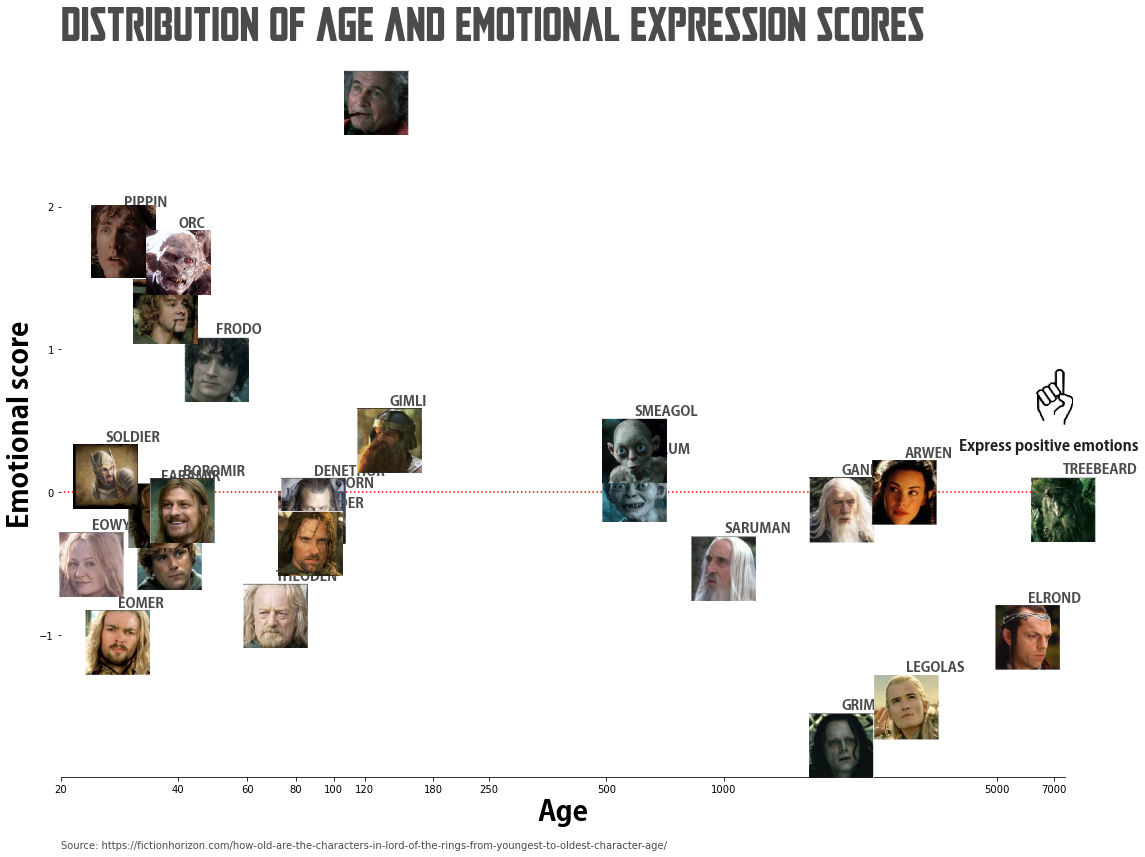

In [32]:
paths = [
    'img/FRODO.png',
    'img/SAM.png',
    'img/GANDALF.png',
    'img/ARAGORN.png',
    'img/PIPPIN.png',
    'img/MERRY.png',
    'img/GOLLUM.png',
    'img/GIMLI.png',
    'img/THEODEN.png',
    'img/FARAMIR.png',
    'img/EOWYN.png',
    'img/LEGOLAS.png',
    'img/SMEAGOL.png',
    'img/BILBO.png', #idx = 13
    'img/TREEBEARD.png', #idx =14
    'img/DENETHOR.png',
    'img/BOROMIR.png',
    'img/ARWEN.png',
    'img/SOLDIER.png',
    'img/EOMER.png',
    'img/SARUMAN.png',
    'img/ELROND.png', # 21
    'img/STRIDER.png',
    'img/GRIMA.png',
    'img/ORC.png',
]

# nn_agev = np.delete(np.delete(agev,[21]), [14]) 
# nn_vfc = np.delete(np.delete(n_vfc,[21]), [14])
# nn_sfc = np.delete(np.delete(sfc,[21]), [14])

nn_agev = agev
nn_vfc = n_vfc
nn_sfc = sfc

fig, ax = plt.subplots(figsize=(18, 13))
plt.scatter(nn_agev, nn_vfc, marker="X")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
# ax.spines['bottom'].set_position(('data',0))
# ax.spines['left'].set_position(('data',0))
ax.spines['left'].set_visible(False)


ax.set_xlim(20,7500)
ax.set_xscale("symlog")
xticks = [0, 20, 40, 60, 80, 100, 120, 180, 250, 500, 1000, 5000,7000]
xmajorLocator = matplotlib.ticker.FixedLocator(locs=xticks) 
xmajorFormatter = matplotlib.ticker.ScalarFormatter()
ax.xaxis.set_major_locator( xmajorLocator )
ax.xaxis.set_major_formatter( xmajorFormatter )
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# ax.set_xscale("log")

# ax.yaxis.set_visible(False)
# ax.xaxis.set_visible(False)

# for i, txt enumerate(sfc):
#     ax.annotate(txt, (nn_agev[i], n_vfc[i]),color=BLACK)

font_path = "style/Mandalore.ttf"
prop = fm.FontProperties(fname=font_path)
# prop_text = fm.FontProperties(fname="style/ChaparralPro-Regular.otf")
prop_text = fm.FontProperties(fname="style/AdobeGothicStd-Bold.otf")

img = image.imread("img/finger.png")
imagebox = OffsetImage(img, zoom = 0.68)
ab2 = AnnotationBbox(imagebox, (7000, 0.67), frameon = False)
ax.add_artist(ab2)
ax.annotate("Express positive emotions", (4000,0.29),
            color=BLACK, size=15,fontproperties=prop_text,transform=ax.transAxes)

for x,y,txt,path in zip(nn_agev, nn_vfc, nn_sfc,paths):
    image_ = image.imread(path)
    imgbox = OffsetImage(image_, zoom = 0.65)
    ab1 = AnnotationBbox(imgbox, (x, y), frameon=False)
    ax.add_artist(ab1)
    ax.annotate(txt, (x, y+0.25),color='#4B4B4B',fontsize = 14,fontproperties=prop_text)

# title, labels, and caption
plt.title('Distribution of age and emotional expression scores', fontproperties=prop,
          pad=30, loc='left', fontsize = 48, color='#4B4B4B')

plt.ylabel('Emotional score',fontsize = 28,fontproperties=prop_text)
plt.xlabel('Age',fontsize = 28,fontproperties=prop_text)

src="Source: https://fictionhorizon.com/how-old-are-the-characters-in-lord-of-the-rings-from-youngest-to-oldest-character-age/"

plt.text(0, -0.1, src, ha='left', fontsize = 10,color='#4B4B4B',transform=ax.transAxes)

plt.hlines(0,0,7100,color="red",linestyles="dotted")

plt.show()

### Result

As we can see from the chart, most of the characters are located near the red line and are within 180 years of each other.

We can observe that the older characters on the right hand side of the picture are indeed closer to the red line as we would expect, which means that their emotional expressions are generally more subtle and not clearly inclined.

Moreover, almost all characters older than 500 do not have a tendency to express more positive words. The characters including Grima, Legolas, and Elrond were the most negatively expressed of all the characters in the group. They are all older than 1000. Therefore, it seems as if older people are more willing to express negative emotions in the world of Lord of the Rings.

At a glance we can see several anomalies. at over 7000 years old, Treebeard is the oldest of these characters. Bilbo, on the other hand, expresses his emotions very strongly. Although he is 129 years old, he is still the character who expresses the most positive emotions and the strongest among them.

What can be said is that young people express their emotions more strongly than older people, both in a negative and positive way. They have no clear emotional orientation, and a significant number of characters are expressing relatively positive emotions, as well as a significant number of characters expressing relatively negative emotions.

## Part C - Demographic Analysis of the Lord of the Rings

Same procedure here just that we now use a data set containing names of characters, their realm, what age/year they have been born into, when the died and what race they belong to. Important to note is that the dataset includes mentioned characters in the entire universe of Tolkien. What is not showcased by the data is the demographic data in that sense that we have the entire population recorded.

In [33]:
# Load data
df_demo = pd.read_csv("data/2022-07-09_LotR_demographics.csv",encoding='utf-8')
df_demo.head()

birth                death  gender                             hair  \
0      Unknow               Unknow  Female                           Unknow   
1     TA 2978  February 26,, ,3019    Male  Dark (book) Light brown (movie)   
2     Unknown        March,, ,3019    Male                           Unknow   
3  TA 280,[1]           TA 515,[2]    Male                           Unknow   
4      Unknow               Unknow    Male                           Unknow   

   height                    name    race   realm        spouse  
0  Unknow                  Adanel     Men  Unknow       Belemir  
1  Unknow                 Boromir     Men  Unknow        Unknow  
2  Unknow                  Lagduf    Orcs  Unknow        Unknow  
3  Unknow                  Tarcil     Men   Arnor  Unnamed wife  
4  Unknow  Fire-drake of Gondolin  Dragon  Unknow        Unknow

## 2.1 Cleaning Data

Here we have to specially deal with missing data and reoccuring commata or other recording errors

In [34]:
# Manipulating data
df_demo[df_demo =="Unknow"] = np.nan
df_demo[df_demo =="Unknown"] = np.nan

# delete useless symbols in datasets
for i in df_demo:    
    df_demo[i] = df_demo[i].str.replace(r"\,\[.*\]","").str.replace(re.escape(", ?"),"").str.replace(re.escape(",?"),"").str.replace(re.escape(",,"),"").str.replace(r"\, \(.*\)","").str.replace(re.escape("?"),"").str.replace(re.escape(", ,"),"")

df_demo

<ipython-input-34-ada4c729aee8>:7: FutureWarning:

The default value of regex will change from True to False in a future version.



birth              death  gender  \
0                                   NaN                NaN  Female   
1                               TA 2978  February 26 ,3019    Male   
2                                   NaN        March ,3019    Male   
3                                TA 280             TA 515    Male   
4                                   NaN                NaN    Male   
..                                  ...                ...     ...   
906                      Mid ,First Age             FA 495  Female   
907                                 NaN                NaN     NaN   
908  YT during the ,Noontide of Valinor             FA 455    Male   
909                             TA 2917            TA 3010    Male   
910                     Before ,TA 1944    Late ,Third Age    Male   

                                hair height                    name    race  \
0                                NaN    NaN                  Adanel     Men   
1    Dark (book) Light brown (movie)    NaN                 Boromir     Men   
2                                NaN    NaN                  Lagduf    Orcs   
3                                NaN    NaN                  Tarcil     Men   
4                                NaN    NaN  Fire-drake of Gondolin  Dragon   
..                               ...    ...                     ...     ...   
906                              NaN    NaN                   Aerin     Men   
907                              NaN    NaN                Aerandir     NaN   
908                           Golden    NaN                  Aegnor   Elves   
909                              NaN    NaN              Adrahil II     Men   
910                              NaN    NaN               Adrahil I     Men   

     realm                                 spouse  
0      NaN                                Belemir  
1      NaN                                    NaN  
2      NaN                                    NaN  
3    Arnor                           Unnamed wife  
4      NaN                                    NaN  
..     ...                                    ...  
906    NaN                                 Brodda  
907    NaN                                    NaN  
908    NaN  Loved ,Andreth but remained unmarried  
909    NaN                           Unnamed wife  
910    NaN                                    NaN  

[911 rows x 9 columns]

## 2.2 Race Data Cleaning and Manipulation

Removing all entries that have a missing ("NaN") for race and unifying entries to combine categories.

In [35]:
# Removing all data entries where the race is NaN
df_clean = df_demo.copy()
df_clean = df_clean[~df_clean.race.isnull()]
df_clean = df_clean.reset_index(drop=True)

# Unification of different terms for same races
for i in range(len(df_clean["race"])):
    if "Men" in df_clean["race"][i]:
        df_clean["race"][i] = "Men"
    elif 'Hobbit' in df_clean["race"][i]:
        df_clean["race"][i] = "Hobbits"
    elif 'Orc' in df_clean["race"][i]:
        df_clean["race"][i] = "Orcs"
    elif 'Dwar' in df_clean["race"][i]:
        df_clean["race"][i] = "Dwarves"
    elif 'Dragon' in df_clean["race"][i]:
        df_clean["race"][i] = "Dragons"
    elif 'El' in df_clean["race"][i]:
        df_clean["race"][i] = "Elves"
    elif 'Half' in df_clean["race"][i]:
        df_clean["race"][i] = "Half-elven"
    elif 'Maiar' in df_clean["race"][i]:
        df_clean["race"][i] = "Maiar"
    else:
        df_clean["race"][i]=df_clean["race"][i]
df_clean["race"].unique()   

array(['Men', 'Orcs', 'Dragons', 'Elves', 'Hobbits', 'Dwarves',
       'Great Spiders', 'Black Uruk', 'Maiar', 'Ainur', 'Raven', 'God',
       'Wolfhound', 'Half-elven', 'Werewolves', 'Horse', 'Eagles',
       'Uruk-hai', 'Great Eagles', 'Drúedain', 'Urulóki', 'Ents,Onodrim',
       'Skin-changer', 'Ents', 'Balrog', 'Eagle', 'Stone-trolls',
       'Vampire'], dtype=object)

In [36]:
# groupby race and gender, calculate count.
race_group = df_clean.groupby(["race"])["name"].count()
race_group = race_group.reset_index()

race = ["Men",'Hobbits','Elves','Dwarves','Dragons','Half-elven','Ainur','Orcs']
race_group = race_group[race_group['race'].isin(race)]
race_group = race_group[0:14]
#race_group = race_group.sort_values(by="name")
race_group

race  name
0        Ainur    24
3      Dragons     6
5      Dwarves    44
8        Elves   108
14  Half-elven     7
15     Hobbits   142
18         Men   395
19        Orcs    13

## 2.3 Visualising Race Distribution

The following code creates a doughnut chart for the race distribution among mentioned characters in the Tolkien Universe

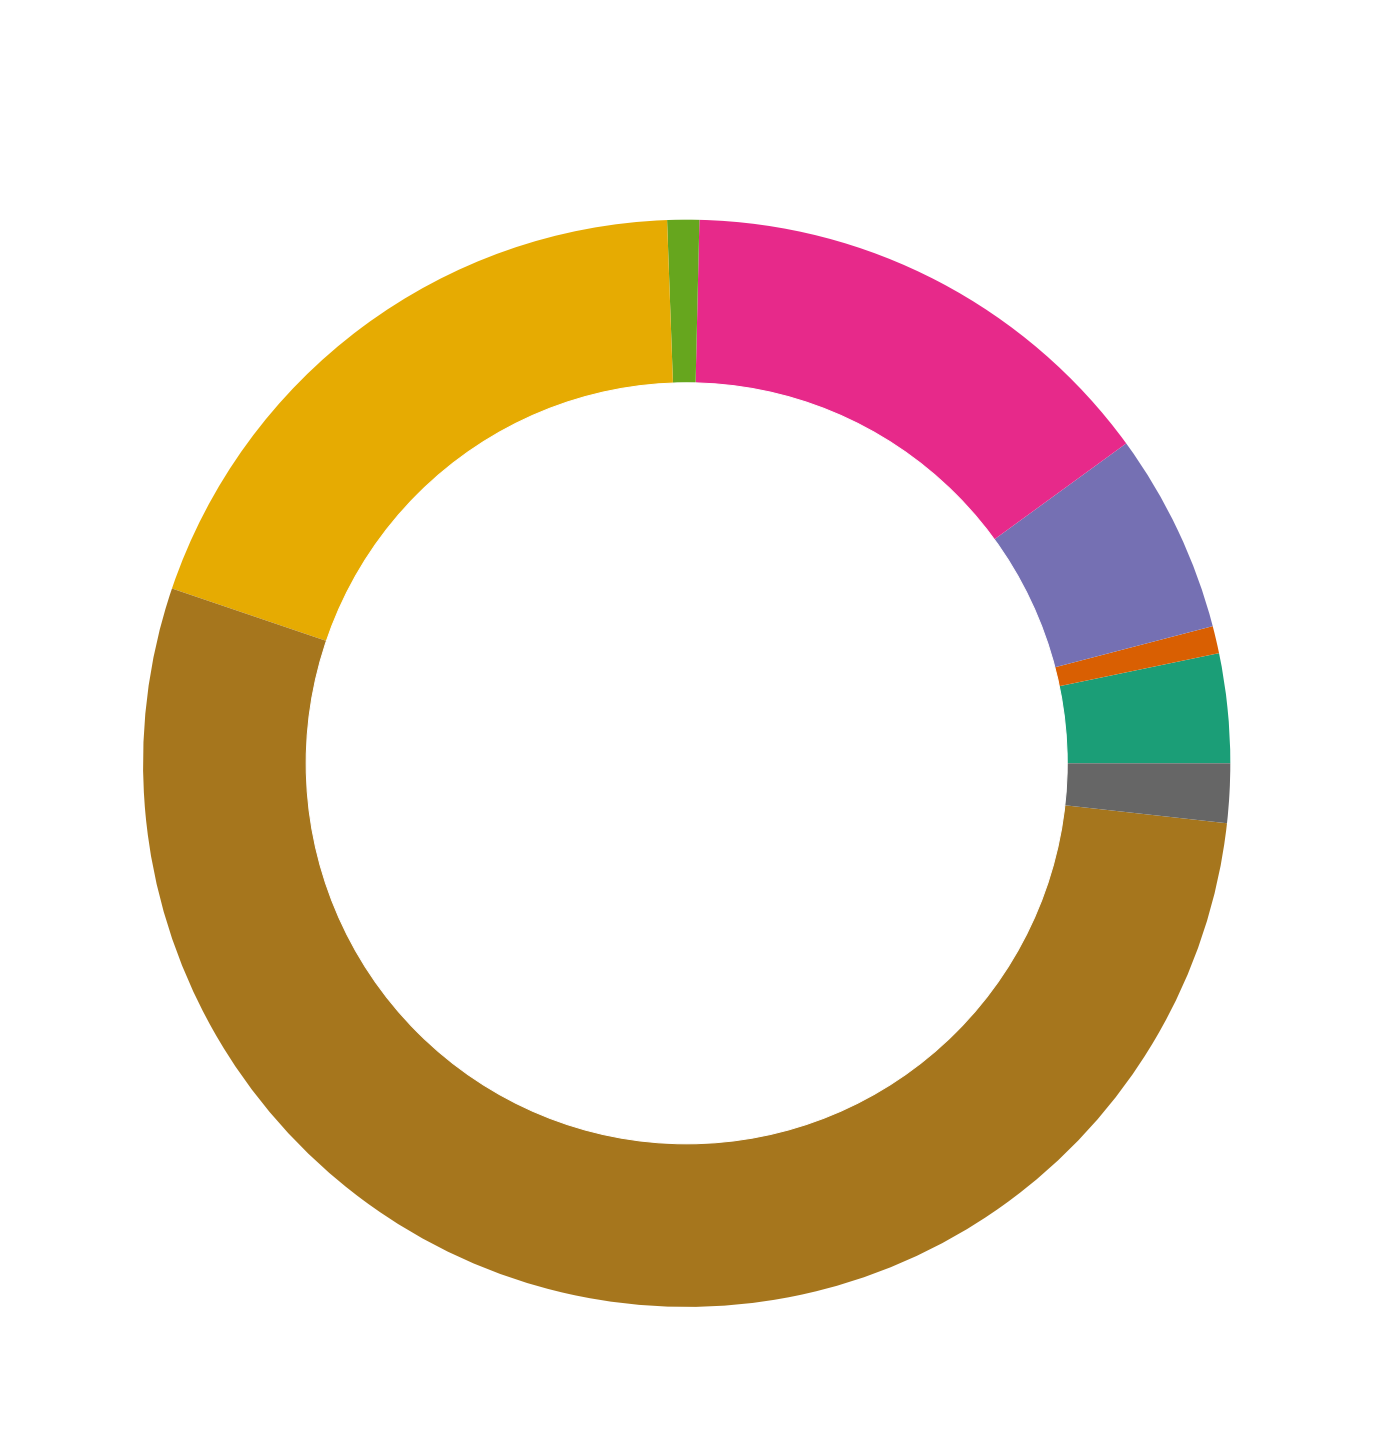

In [37]:
# Create a doughnut chart

# add a circle at the center to transform it in a doughnut chart
sns.mpl.rc("figure", figsize=(25,25))
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Set colours

plt.rcParams['text.color'] = 'white'
plt.pie(race_group["name"], labels = race_group["race"], colors=Dark2_8.hex_colors, labeldistance=1.05,textprops={'fontsize': 32})

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.figtext(.5,.9,'Race Distribution', fontsize=54, ha='center')
plt.show()

## 2.4 Cleaning Realm Data

Cleaning data in such a way that only realms from the Third Age are still available in the data. For the visualisation we can feasibly use a map of the Third Age only.

In [38]:
df_realm = df_demo.copy()

# deleting rows that have no realm
df_realm = df_realm[~df_realm.realm.isnull()]
df_realm = df_realm.reset_index(drop=True)

# This is a list to know what realms exist in the Third Age. It has no practical use other than helping the programmer.
realms_middleearth = ["Arnor", "Gondor", "Rohan", "Shire", "Minas Ithil", "Lonely Mountain", "Torech Ungol", "Cirith Ungol", "Bree",
                      "Isengard", "Rhûn,Dol Guldur,Sauron", "Rivendell", "Reunited Kingdom","Woodland Realm", "Grey Mountains", "Khazad-dûm",
                      "Lake-town", "Buckland", "Mount Gram", "Havens of Sirion,Lindon", "Arthedain",
                     "Eregion", "Minas Morgul", "Doors of Durin", "Rhovanion",
                     "Isengard", "Dale", "Woodland Realm,Mirkwood","White Mountains,Paths of the Dead",
                     "Moria,Mount Gundabad", "Lórien"]

# Unification of realms
for i in range(len(df_realm["realm"])):
    if "Arthedain" in df_realm["realm"][i]:
        df_realm["realm"][i] = "Arthedain"
    elif "Reunited Kingdom" in df_realm["realm"][i]:
        df_realm["realm"][i] = "Reunited Kingdom"
    elif "Arnor" in df_realm["realm"][i]:
        df_realm["realm"][i] = "Arnor"
    elif "Khazad" in df_realm["realm"][i]:
        df_realm["realm"][i] = "Khazad-dûm"
    elif "Dale" in df_realm["realm"][i]:
        df_realm["realm"][i] = "Dale"
    elif "Isengard" in df_realm["realm"][i]:
        df_realm["realm"][i] = "Isengard"
    elif "Lonely" in df_realm["realm"][i]:
        df_realm["realm"][i] = "Lonely Mountain"
    elif "Minas Morgul" in df_realm["realm"][i]:
        df_realm["realm"][i] = "Minas Morgul"   
    elif "Lothlórien" in df_realm["realm"][i]:
        df_realm["realm"][i] = "Lórien"   
    elif "Beleriand" in df_realm["realm"][i]:
        df_realm["realm"][i] = "Beleriand"
    elif "Valinor" in df_realm["realm"][i]:
        df_realm["realm"][i] = "Valinor" 
    elif "Mirkwood" in df_realm["realm"][i]:
        df_realm["realm"][i] = "Mirkwood" 

# removal of realms not present in Third Age (no accurate maps)        
df_realm = df_realm.drop(df_realm[df_realm.realm == "Númenor"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Tirion,Formenos"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Hithlum,Beleriand"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Valinor"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Timeless Halls"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Nan Elmoth"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Nargothrond"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Tol Eressëa,Alqualondë"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Brethil"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Doriath"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Himlad"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Pastures of Yavanna"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Old Forest"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Tol Eressëa"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Arda"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Nevrast,Gondolin"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Estolad"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Ered Luin"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "TA 2"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Hithlum"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Beleriand"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Tirion"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Ossiriand"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Angband"].index)
df_realm = df_realm.drop(df_realm[df_realm.realm == "Havens of Sirion,Lindon"].index)

unique_realms = df_realm["realm"].unique()
print(unique_realms)
print(len(unique_realms))

['Arnor' 'Gondor' 'Rohan' 'Shire' 'Minas Ithil' 'Lonely Mountain'
 'Torech Ungol' 'Cirith Ungol' 'Isengard' 'Bree' 'Rhûn,Dol Guldur,Sauron'
 'Rivendell' 'Reunited Kingdom' 'Woodland Realm' 'Grey Mountains'
 'Khazad-dûm' 'Dale' 'Lake-town' 'Minas Morgul' 'Buckland' 'Mount Gram'
 'Arthedain' 'Eregion' 'Lórien' 'Doors of Durin' 'Rhovanion' 'Mirkwood'
 'White Mountains,Paths of the Dead' 'Moria,Mount Gundabad']
29


## 2.5 Manipulating Realm Data 

Manipulating data of the realms so we get the amount of characters from a certain realm. Additionally adding coordinates that fit the map image.

In [39]:
realm_group = df_realm.groupby(["realm"])["name"].count()
realm_group = realm_group.reset_index()
realm_group = realm_group.sort_values(by = "name")
realm_group

# data creation for the map
data = realm_group
data
x_coordinates = [1340, 1350, 1600, 1300, 1450, 1070, 1370, 1600, 1130, 1125, 1625, 1300, 1010, 760, 790, 1680, 1125, 1160, 1630, 1100, 1250, 1200, 1420, 730, 1395, 790, 770, 1270, 1300]
y_coordinates = [350, 380, 1120, 1000, 340, 170, 656, 550, 586, 450, 1075, 600, 230, 470, 450, 1090, 880, 600, 1060, 1160, 630, 180, 320, 500, 300, 370, 320, 950, 1230]
y_coordinates2 = [520, 400, 1125, 522, 1180, 1350, 850, 980, 978, 1100, 472, 978, 1312, 1052, 1052, 1125, 642, 978, 462, 362, 892, 1342, 1180, 1022, 1222, 1152, 1222, 542, 290] # 1522
data["x_coordinates"] = x_coordinates
data["y_coordinates"] = y_coordinates
data["y_coordinates2"] = y_coordinates2
data

realm  name  x_coordinates  y_coordinates  \
28                     Woodland Realm     1           1340            350   
17                           Mirkwood     1           1350            380   
15                        Minas Ithil     1           1600           1120   
27  White Mountains,Paths of the Dead     1           1300           1000   
12                          Lake-town     1           1450            340   
18               Moria,Mount Gundabad     1           1070            170   
22             Rhûn,Dol Guldur,Sauron     1           1370            656   
21                          Rhovanion     1           1600            550   
6                      Doors of Durin     1           1130            586   
23                          Rivendell     1           1125            450   
26                       Torech Ungol     1           1625           1075   
7                             Eregion     1           1300            600   
19                         Mount Gram     1           1010            230   
3                            Buckland     2            760            470   
2                                Bree     2            790            450   
16                       Minas Morgul     2           1680           1090   
10                           Isengard     3           1125            880   
11                         Khazad-dûm     3           1160            600   
4                        Cirith Ungol     3           1630           1060   
20                   Reunited Kingdom     3           1100           1160   
14                             Lórien     4           1250            630   
9                      Grey Mountains     4           1200            180   
5                                Dale     5           1420            320   
25                              Shire     5            730            500   
13                    Lonely Mountain     6           1395            300   
0                               Arnor     9            790            370   
1                           Arthedain    16            770            320   
24                              Rohan    20           1270            950   
8                              Gondor    33           1300           1230   

    y_coordinates2  
28             520  
17             400  
15            1125  
27             522  
12            1180  
18            1350  
22             850  
21             980  
6              978  
23            1100  
26             472  
7              978  
19            1312  
3             1052  
2             1052  
16            1125  
10             642  
11             978  
4              462  
20             362  
14             892  
9             1342  
5             1180  
25            1022  
13            1222  
0             1152  
1             1222  
24             542  
8              290

## 2.6 Visualising Characters and their Realms by Bubbles on a Map of Middle Earth

Using a scatterplot to create in size flexible points/bubbles to showcase where on Middle Earth characters mentioned in the Tolkien Universe are from.

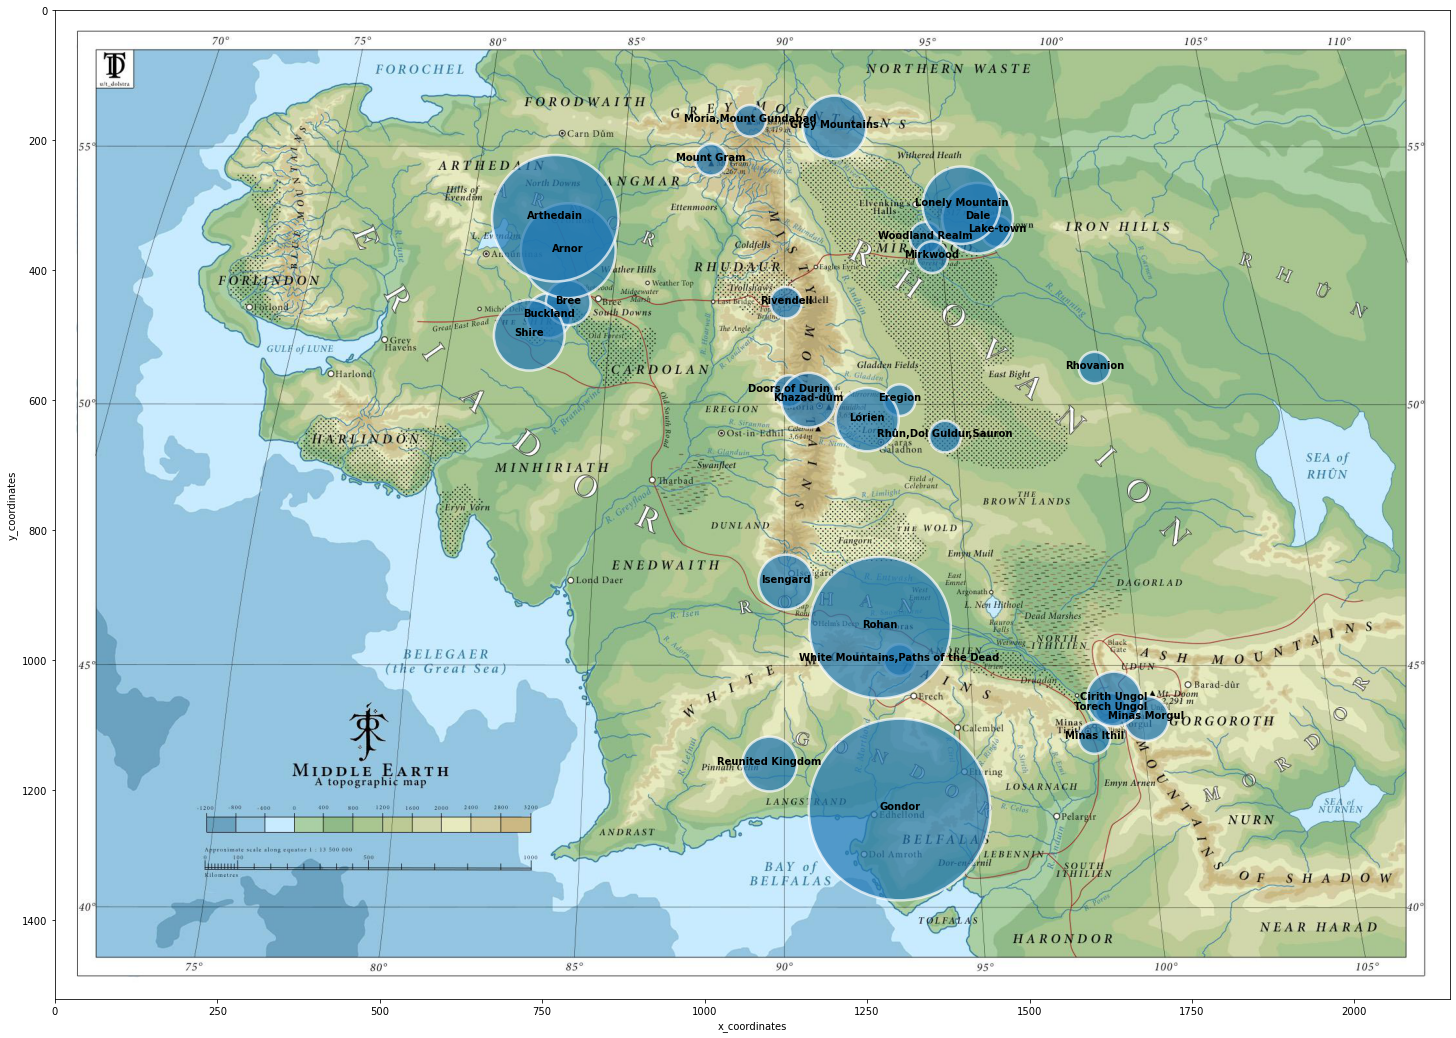

In [40]:
ax = sns.scatterplot(data = data, x="x_coordinates", y="y_coordinates", s=data["name"]*1000, alpha = 0.7)

img = plt.imread("img/middleearthmap.jpg")
plt.imshow(img, zorder=0)

for line in range(0,data.shape[0]):
     ax.text(data.x_coordinates[line], data.y_coordinates[line], data.realm[line], horizontalalignment='center', size='medium', color='black', weight='semibold')

#plt.figtext(.5,.9,'Realms of mentioned characters', fontsize=54, ha='center') #needs reviewing doesn't work
        
# show the graph
plt.show()

## Reference

### Overview

Gilsdorf, Ethan. Lord of the Gold Ring. The Boston Globe. November 16, 2003 [2006-06-16].

Wagner, Vit. Tolkien proves he's still the king. The Star. 2007-04-16 [2011-04-24]. 

### Part A

https://github.com/MokoSan/FSharpAdvent/blob/master/Data/Movies.csv

https://medium.com/@mukund.sharma92/the-lord-of-the-rings-an-f-approach-the-path-of-the-hobbits-f2b84cfab859

https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py

https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html

https://www.boxofficemojo.com/?ref_=bo_nb_gr_mojologo

https://www.imdb.com/

https://www.metacritic.com/

https://www.rottentomatoes.com/

### Part B 

Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

https://github.com/tianyigu/Lord_of_the_ring_project

<!-- ages -->

https://fictionhorizon.com/how-old-are-the-characters-in-lord-of-the-rings-from-youngest-to-oldest-character-age/

https://lotr.fandom.com/wiki

https://screenrant.com/lord-rings-fellowship-characters-ages-how-old/

https://www.statista.com/statistics/384102/age-of-selected-characters-in-lord-of-the-rings/

https://imgur.com/355G0pm


### Part C

<!-- map -->
[OC] Topographic Map of Middle Earth - Updated!
@t_dolstra
https://www.reddit.com/r/lotr/comments/h7ecs7/oc_topographic_map_of_middle_earth_updated/